In [119]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta

import numpy.random as npr
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy as sp
import seaborn as sns

#%matplotlib widget
%matplotlib inline

In [197]:
province    = pd.read_csv('../dati-province/dpc-covid19-ita-province.csv')
regioni     = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni.csv')
italia      = pd.read_csv('../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
Popolazione = pd.read_csv('Popolazione_Regioni.csv', names=('provincia','sigla', 'popolazione'))
regione

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,2021-12-18T17:00:00,ITA,19,Sicilia,38.115697,13.362357,494,55,549,19326,...,DECEDUTI: N. 3 IL 17/12/21 - N. 5 IL 16/12/21 ...,9.0,NaN,NaN,341285.0,0.0,3674956.0,4233164.0,ITG,ITG1
13940,2021-12-18T17:00:00,ITA,9,Toscana,43.769231,11.255889,331,58,389,15500,...,NaN,6.0,NaN,NaN,309988.0,5986.0,5225978.0,3318578.0,ITI,ITI1
13941,2021-12-18T17:00:00,ITA,10,Umbria,43.106758,12.388247,52,8,60,3366,...,"Si fa presente che due dei ricoveri NON UTI, n...",0.0,NaN,NaN,70819.0,0.0,1291716.0,1371892.0,ITI,ITI2
13942,2021-12-18T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,20,2,22,851,...,NaN,0.0,NaN,NaN,12700.0,1535.0,121769.0,204910.0,ITC,ITC2


In [192]:
today = datetime.today().strftime('%d/%m/%Y')
yesterday = (date.today() - timedelta(days=1)).strftime('%d/%m/%Y')
idx = pd.date_range('27/12/2020', today)

NomiProvince  = province.denominazione_provincia.unique()
NomiProvince.sort()
Popolazione['provincia'] = NomiProvince 
Popolazione = Popolazione.set_index('provincia')

#create a data frame dictionary to store your data frames
Province = {elem : pd.DataFrame for elem in NomiProvince}
for key in Province.keys():
    Province[key] = province[:][province.denominazione_provincia == key]
    Province[key]['data']                  = pd.to_datetime(Province[key]['data'])
    Province[key]['data']                  = Province[key]['data'].dt.strftime('%d/%m/%Y')
    Province[key]['casi_giornalieri']      = Province[key]['totale_casi'] - Province[key]['totale_casi'].shift(1)
    Province[key]['media_casi_giorn']      = Province[key]['casi_giornalieri'].rolling(window=7, min_periods=1).mean()
    Province[key]['casi_giornalieri_norm'] = Province[key]['casi_giornalieri'] / Popolazione.at[key,'popolazione'] * 1e5
    Province[key]['media_casi_giorn_norm'] = Province[key]['media_casi_giorn'] / Popolazione.at[key,'popolazione'] * 1e5

Province

{'Agrigento':              data stato  codice_regione denominazione_regione  \
 97     24/02/2020   ITA              19               Sicilia   
 225    25/02/2020   ITA              19               Sicilia   
 353    26/02/2020   ITA              19               Sicilia   
 481    27/02/2020   ITA              19               Sicilia   
 609    28/02/2020   ITA              19               Sicilia   
 ...           ...   ...             ...                   ...   
 95742  14/12/2021   ITA              19               Sicilia   
 95891  15/12/2021   ITA              19               Sicilia   
 96040  16/12/2021   ITA              19               Sicilia   
 96189  17/12/2021   ITA              19               Sicilia   
 96338  18/12/2021   ITA              19               Sicilia   
 
        codice_provincia denominazione_provincia sigla_provincia        lat  \
 97                   84               Agrigento              AG  37.309711   
 225                  84           

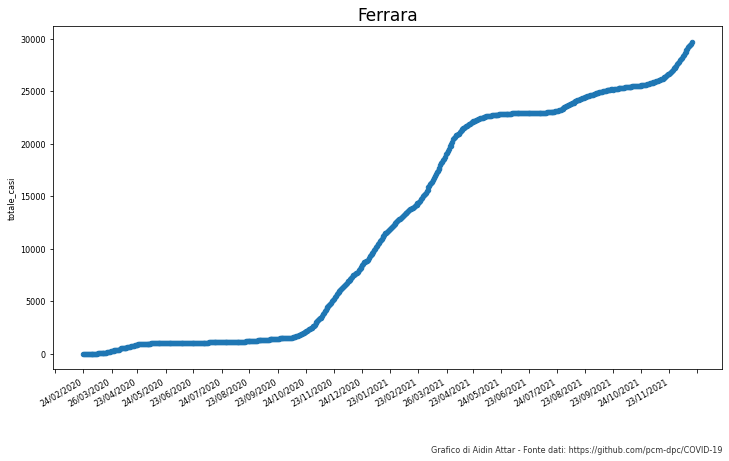

In [193]:
fig, ax = plt.subplots(figsize=(12, 7))

Province['Ferrara'].plot(ax = ax, x ='data', y='totale_casi',
                         kind = 'scatter', title = "Ferrara",
                         xlabel = '')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Ferrara', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

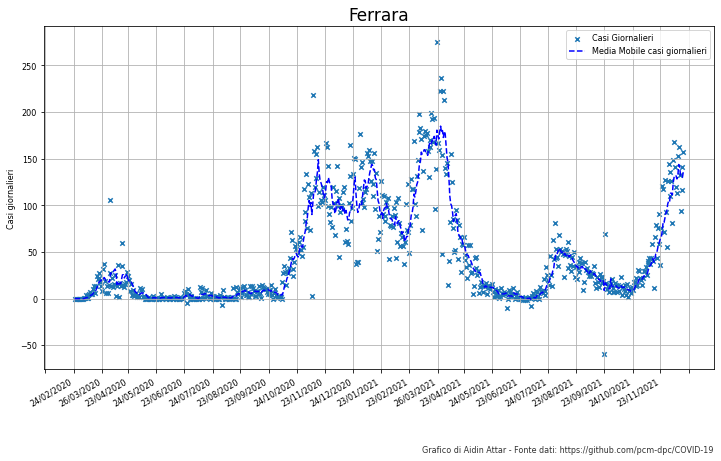

In [205]:
fig, ax = plt.subplots(figsize=(12, 7))

Province['Ferrara'].plot(ax = ax, x ='data', y='casi_giornalieri',
             kind = 'scatter', title = "Ferrara", label = 'Casi Giornalieri',
             marker = 'x', color = 'C0',)
Province['Ferrara'].plot(ax = ax, x ='data', y='media_casi_giorn',
             kind = 'line', title = "Ferrara", color = 'blue',
             label = 'Media Mobile casi giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Ferrara', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()


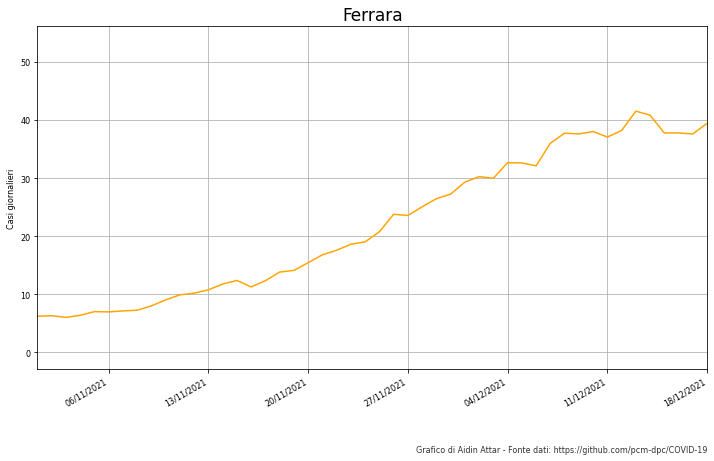

In [243]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(Province['Ferrara']['data'], Province['Ferrara']['media_casi_giorn_norm'], color = 'orange',
             label = 'Media Mobile casi giornalieri')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_title('Ferrara', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.set_xlim([date(2021, 11, 1).strftime('%d/%m/%Y'), today])
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()


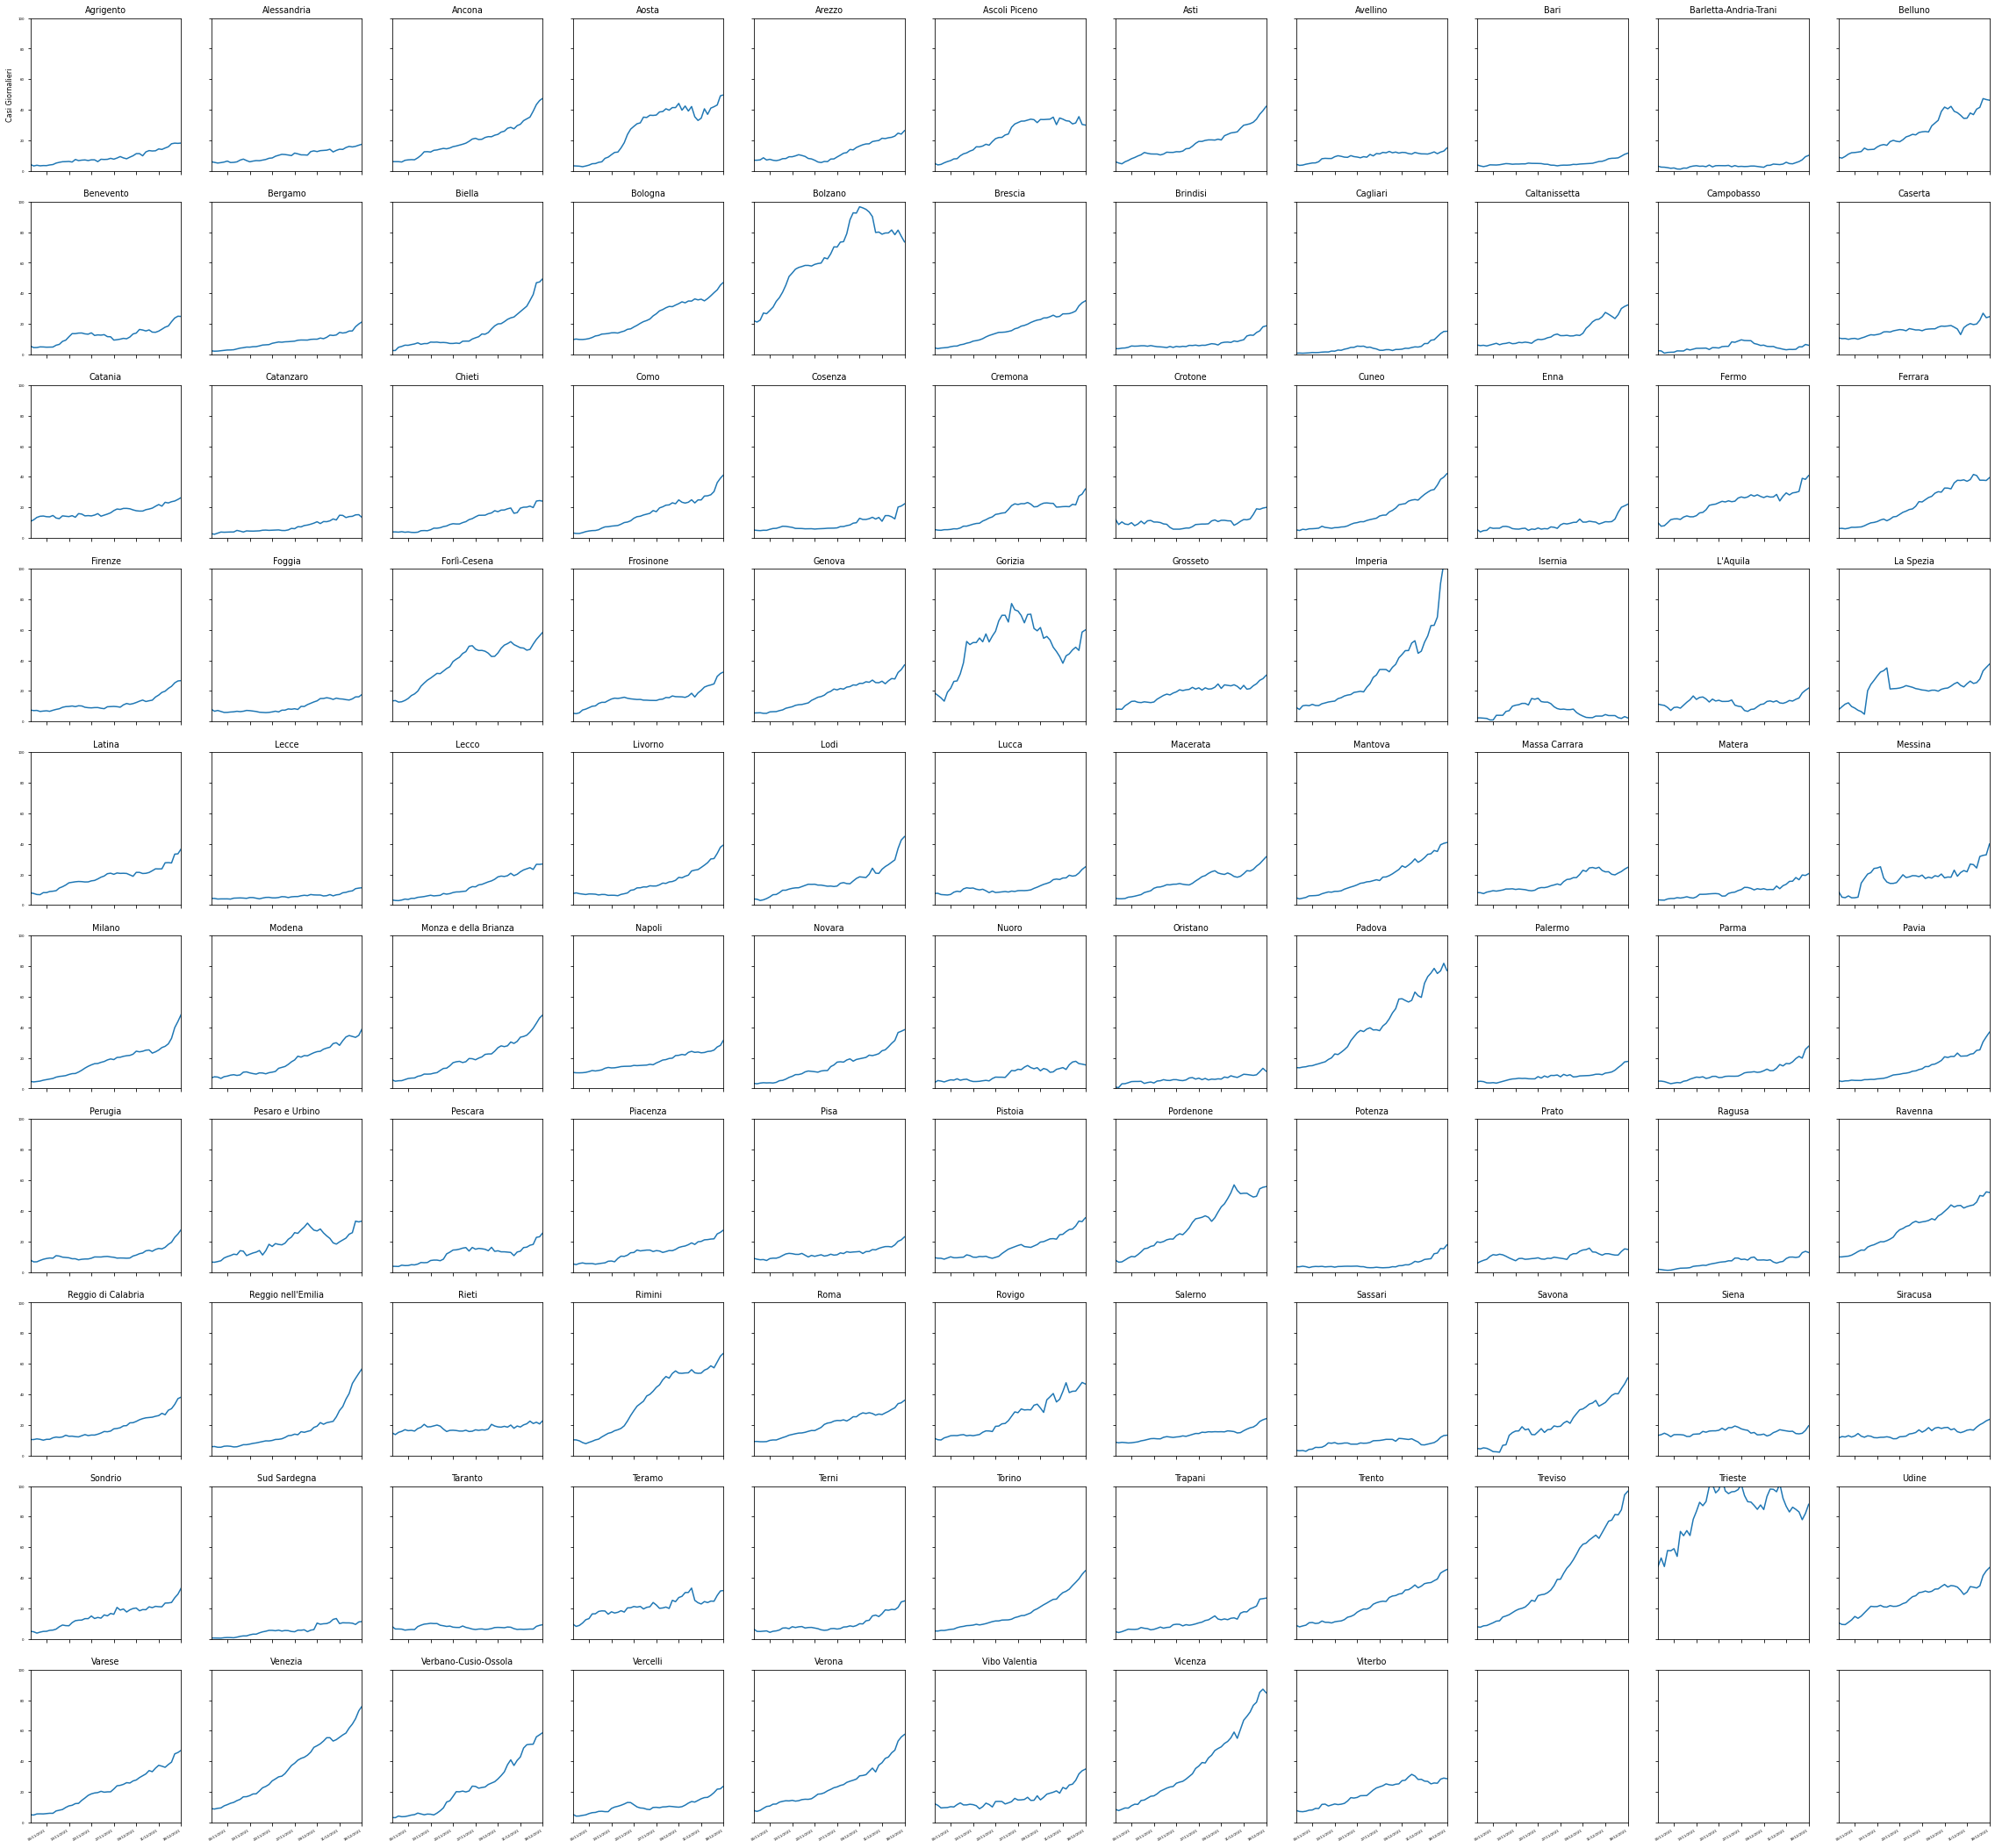

In [194]:
fig, ax = plt.subplots(nrows=10, ncols=11, sharey=True, sharex=True, figsize=(40, 42))

x = 0
y = 0
for key in Province.keys():
    if key != 'In fase di definizione/aggiornamento' and key != 'Fuori Regione / Provincia Autonoma':
        #print('Computing ', key)
        ax[y,x].plot(Province[key]['data'], Province[key]['media_casi_giorn_norm'])
        ax[y,x].set_title(key)
        x += 1
        if x == 11:
            y +=1
            x = 0
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Casi Giornalieri')
ax[1,0].set_ylabel('Casi Giornalieri')
ax[2,0].set_ylabel('Casi Giornalieri')
ax[3,0].set_ylabel('Casi Giornalieri')
ax[4,0].set_ylabel('Casi Giornalieri')
ax[5,0].set_ylabel('Casi Giornalieri')
ax[6,0].set_ylabel('Casi Giornalieri')
ax[7,0].set_ylabel('Casi Giornalieri')
ax[8,0].set_ylabel('Casi Giornalieri')
ax[9,0].set_ylabel('Casi Giornalieri')
fig.autofmt_xdate()
ax[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax[0,0].set_xlim([date(2021, 1, 10).strftime('%d/%m/%Y'), today])
ax[0,0].set_ylim([0, 100])

plt.show()

In [285]:
NomiRegioni  = regione.denominazione_regione.unique()

#create a data frame dictionary to store your data frames
Regioni = {elem : pd.DataFrame for elem in NomiRegioni}
for key in Regioni.keys():
    Regioni[key] = regioni[:][regioni.denominazione_regione == key]
    Regioni[key]['data']                  = pd.to_datetime(Regioni[key]['data'])
    Regioni[key]['data']                  = Regioni[key]['data'].dt.strftime('%d/%m/%Y')
    Regioni[key]['casi_giornalieri']      = Regioni[key]['totale_casi'] - Regioni[key]['totale_casi'].shift(1)
    Regioni[key]['media_casi_giorn']      = Regioni[key]['casi_giornalieri'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['morti_giornalieri']     = Regioni[key]['deceduti'] - Regioni[key]['deceduti'].shift(1)
    Regioni[key]['media_morti_giorn']     = Regioni[key]['morti_giornalieri'].rolling(window=7, min_periods=1).mean()

    Regioni[key]['tamponi_giornalieri'] = Regioni[key]['tamponi'] - Regioni[key]['tamponi'].shift(1)
    Regioni[key]['media_tamponi']       = Regioni[key]['tamponi_giornalieri'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tasso_positivi']      = Regioni[key]['casi_giornalieri'] / Regioni[key]['tamponi_giornalieri'] * 100
    Regioni[key].drop(Regioni[key][Regioni[key].tasso_positivi < 0].index, inplace=True)
    Regioni[key]['media_tasso_positivi']     = Regioni[key]['tasso_positivi'].rolling(window=7, min_periods=1).mean()

    Regioni[key]['casi_testati_giorn'] = Regioni[key]['casi_testati'] - Regioni[key]['casi_testati'].shift(1)
    Regioni[key]['media_casi_testati'] = Regioni[key]['casi_testati_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tasso_casi']         = Regioni[key]['casi_giornalieri'] / Regioni[key]['casi_testati_giorn'] * 100
    Regioni[key].drop(Regioni[key][Regioni[key].tasso_casi < 0].index, inplace=True)
    Regioni[key]['media_tasso_casi']   = Regioni[key]['tasso_casi'].rolling(window=7, min_periods=1).mean()

    Regioni[key]['tamponi_test_molecolare_giorn']         = Regioni[key]['tamponi_test_molecolare']         - Regioni[key]['tamponi_test_molecolare'].shift(1)
    Regioni[key]['media_tamponi_test_molecolare_giorn'] = Regioni[key]['tamponi_test_molecolare_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['totale_positivi_test_molecolare_giorn'] = Regioni[key]['totale_positivi_test_molecolare'] - Regioni[key]['totale_positivi_test_molecolare'].shift(1)
    Regioni[key]['media_pos_molecolare']                  = Regioni[key]['totale_positivi_test_molecolare_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tasso_molecolare']                      = Regioni[key]['totale_positivi_test_molecolare_giorn'] / Regioni[key]['tamponi_test_molecolare_giorn'] * 100
    Regioni[key].drop(Regioni[key][Regioni[key].tasso_molecolare < 0].index, inplace=True)
    Regioni[key]['media_tasso_molecolare']                = Regioni[key]['tasso_molecolare'].rolling(window=7, min_periods=1).mean()

    Regioni[key]['tamponi_test_antigenico_rapido_giorn']  = Regioni[key]['tamponi_test_antigenico_rapido']  - Regioni[key]['tamponi_test_antigenico_rapido'].shift(1)
    Regioni[key]['media_test_antigenico_rapido_giorn'] = Regioni[key]['tamponi_test_antigenico_rapido_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['totale_positivi_test_antigenico_rapido_giorn'] = Regioni[key]['totale_positivi_test_antigenico_rapido'] - Regioni[key]['totale_positivi_test_antigenico_rapido'].shift(1)
    Regioni[key]['media_pos_antigenico_rapido']                  = Regioni[key]['totale_positivi_test_antigenico_rapido_giorn'].rolling(window=7, min_periods=1).mean()
    Regioni[key]['tasso_antigenico_rapido']                      = Regioni[key]['totale_positivi_test_antigenico_rapido_giorn'] / Regioni[key]['tamponi_test_antigenico_rapido_giorn'] * 100
    Regioni[key].drop(Regioni[key][Regioni[key].tasso_molecolare < 0].index, inplace=True)
    Regioni[key]['media_tasso_antigenico_rapido']                = Regioni[key]['tasso_antigenico_rapido'].rolling(window=7, min_periods=1).mean()

Regioni

{'Abruzzo':              data stato  codice_regione denominazione_regione        lat  \
 0      24/02/2020   ITA              13               Abruzzo  42.351222   
 21     25/02/2020   ITA              13               Abruzzo  42.351222   
 42     26/02/2020   ITA              13               Abruzzo  42.351222   
 63     27/02/2020   ITA              13               Abruzzo  42.351222   
 84     28/02/2020   ITA              13               Abruzzo  42.351222   
 ...           ...   ...             ...                   ...        ...   
 13839  14/12/2021   ITA              13               Abruzzo  42.351222   
 13860  15/12/2021   ITA              13               Abruzzo  42.351222   
 13881  16/12/2021   ITA              13               Abruzzo  42.351222   
 13902  17/12/2021   ITA              13               Abruzzo  42.351222   
 13923  18/12/2021   ITA              13               Abruzzo  42.351222   
 
             long  ricoverati_con_sintomi  terapia_intensiva  \

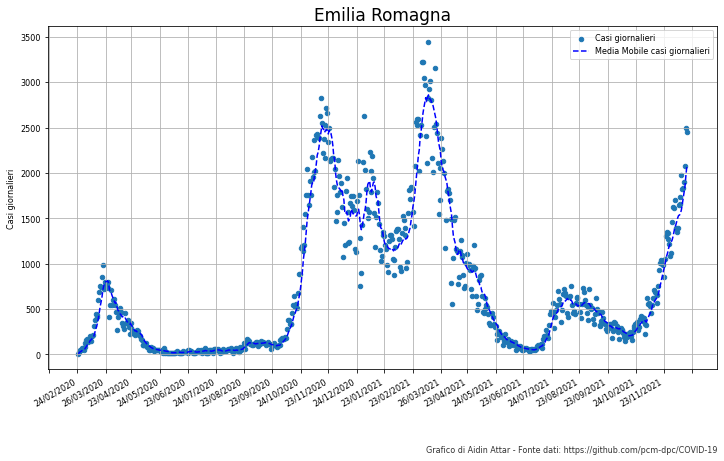

In [210]:
fig, ax = plt.subplots(figsize=(12, 7))

Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='casi_giornalieri', 
                               kind='scatter', label='Casi giornalieri',  color='C0')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_casi_giorn'],
        color = 'blue', label = 'Media Mobile casi giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Emilia Romagna', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.legend()
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

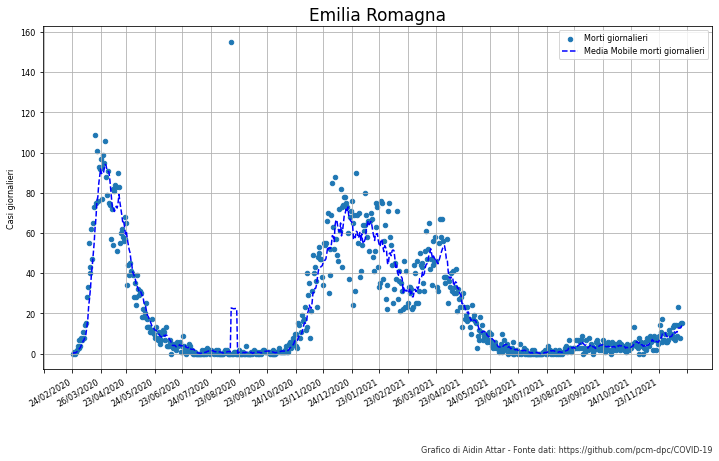

In [211]:
fig, ax = plt.subplots(figsize=(12, 7))

Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='morti_giornalieri', 
                               kind='scatter', label='Morti giornalieri',  color='C0')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_morti_giorn'],
        color = 'blue', label = 'Media Mobile morti giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Emilia Romagna', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.legend()
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

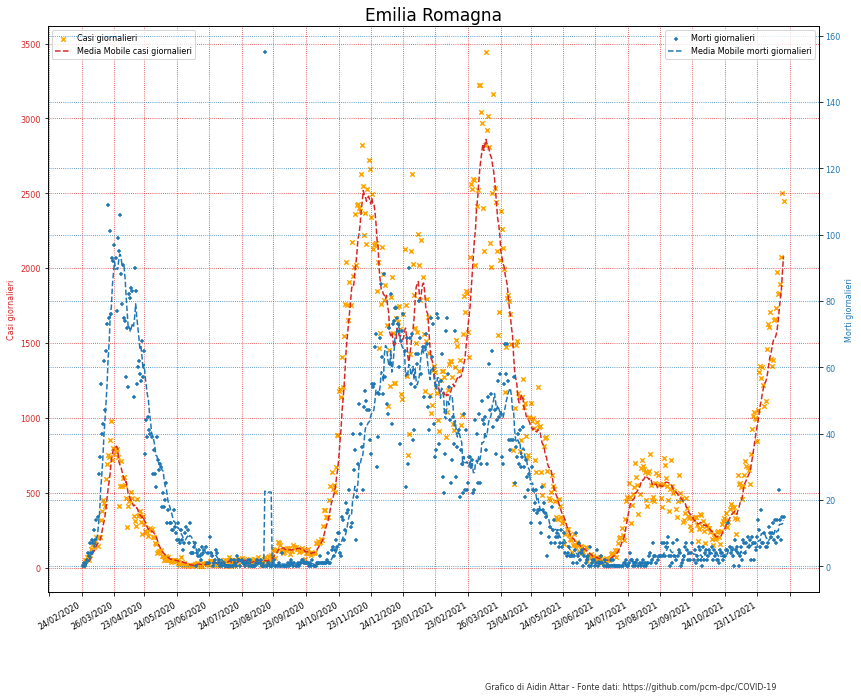

In [233]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Casi giornalieri', color=color)
Regioni['Emilia-Romagna'].plot(ax=ax1, x ='data', y='casi_giornalieri', 
                               kind='scatter', label='Casi giornalieri',  color='orange',
                               marker='x', ylabel='Casi giornalieri', xlabel='')
ax1.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_casi_giorn'],
        color = color, label = 'Media Mobile casi giornalieri', linestyle='dashed')

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Morti giornalieri', color=color)

Regioni['Emilia-Romagna'].plot(ax=ax2, x ='data', y='morti_giornalieri', 
                               kind='scatter', label='Morti giornalieri',  color='C0',
                               marker='+', ylabel='Morti giornalieri', xlabel='')
ax2.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_morti_giorn'],
        color = color, label = 'Media Mobile morti giornalieri', linestyle='dashed')

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.set_title('Emilia Romagna', fontsize=17)
plt.rcParams['font.size'] = '8'
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.legend(loc='upper right')

ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [235]:
italia['data']                  = pd.to_datetime(italia['data'])
italia['data']                  = italia['data'].dt.strftime('%d/%m/%Y')
italia['casi_giornalieri']      = italia['totale_casi'] - italia['totale_casi'].shift(1)
italia['media_casi_giorn']      = italia['casi_giornalieri'].rolling(window=7, min_periods=1).mean()
italia['morti_giornalieri']     = italia['deceduti'] - italia['deceduti'].shift(1)
italia['media_morti_giorn']     = italia['morti_giornalieri'].rolling(window=7, min_periods=1).mean()

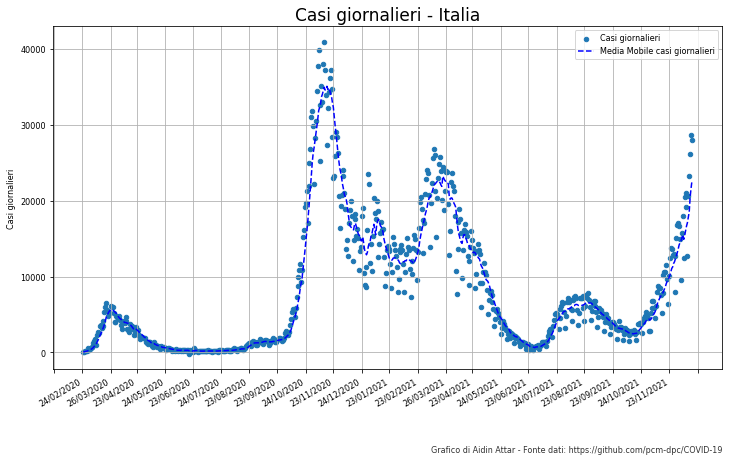

In [236]:
fig, ax = plt.subplots(figsize=(12, 7))

italia.plot(ax=ax, x ='data', y='casi_giornalieri', 
                               kind='scatter', label='Casi giornalieri',  color='C0')
ax.plot(italia['data'], italia['media_casi_giorn'],
        color = 'blue', label = 'Media Mobile casi giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Casi giornalieri - Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.legend()
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

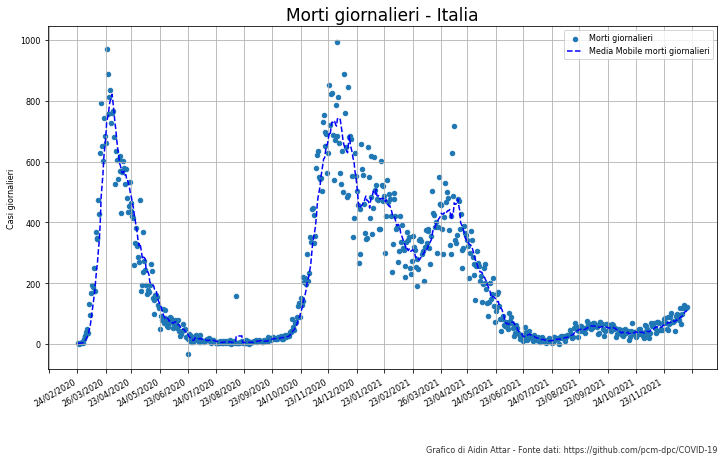

In [237]:
fig, ax = plt.subplots(figsize=(12, 7))

italia.plot(ax=ax, x ='data', y='morti_giornalieri', 
                               kind='scatter', label='Morti giornalieri',  color='C0')
ax.plot(italia['data'], italia['media_morti_giorn'],
        color = 'blue', label = 'Media Mobile morti giornalieri', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Morti giornalieri - Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Casi giornalieri')
ax.set_xlabel("")
ax.legend()
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

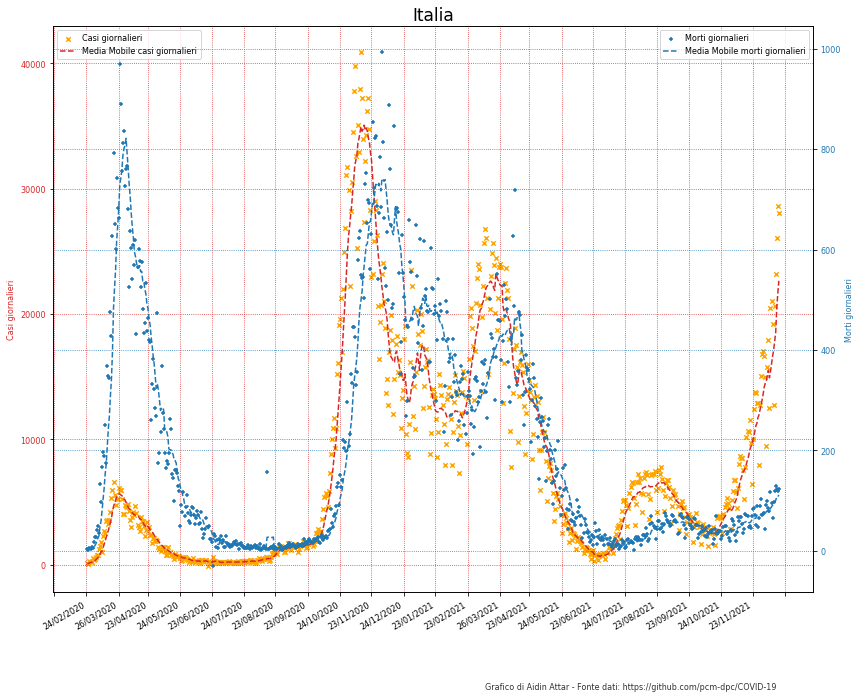

In [238]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Casi giornalieri', color=color)
italia.plot(ax=ax1, x ='data', y='casi_giornalieri', 
                               kind='scatter', label='Casi giornalieri',  color='orange',
                               marker='x', ylabel='Casi giornalieri', xlabel='')
ax1.plot(italia['data'], italia['media_casi_giorn'],
        color = color, label = 'Media Mobile casi giornalieri', linestyle='dashed')

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Morti giornalieri', color=color)

italia.plot(ax=ax2, x ='data', y='morti_giornalieri', 
                               kind='scatter', label='Morti giornalieri',  color='C0',
                               marker='+', ylabel='Morti giornalieri', xlabel='')
ax2.plot(italia['data'], italia['media_morti_giorn'],
        color = color, label = 'Media Mobile morti giornalieri', linestyle='dashed')

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.set_title('Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.legend(loc='upper right')

ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


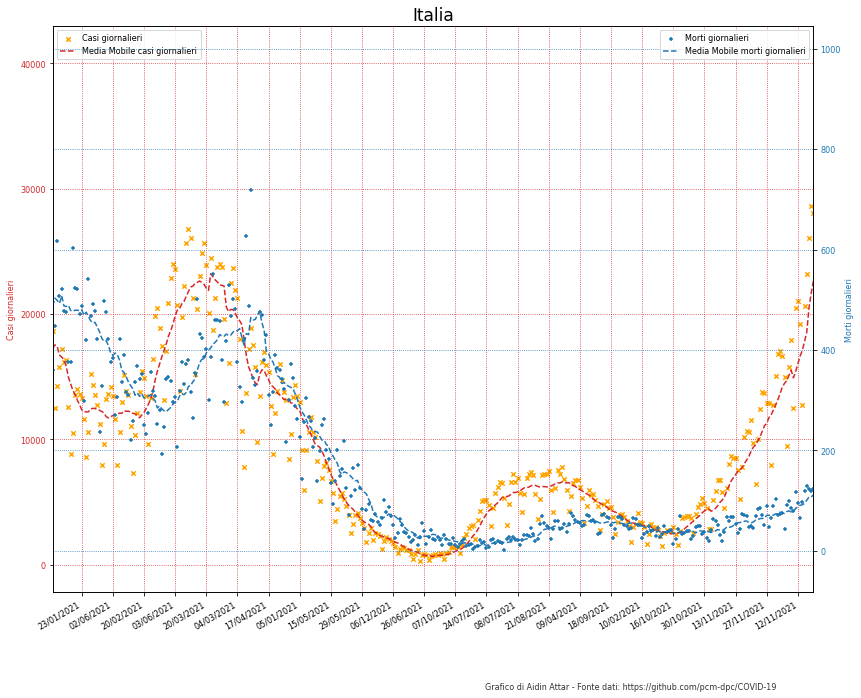

In [273]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Casi giornalieri', color=color)
italia.plot(ax=ax1, x ='data', y='casi_giornalieri', 
                               kind='scatter', label='Casi giornalieri',  color='orange',
                               marker='x', ylabel='Casi giornalieri', xlabel='')
ax1.plot(italia['data'], italia['media_casi_giorn'],
         color = color, label = 'Media Mobile casi giornalieri', linestyle='dashed')

ax1.set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today])
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Morti giornalieri', color=color)

italia.plot(ax=ax2, x ='data', y='morti_giornalieri', 
                               kind='scatter', label='Morti giornalieri',  color='C0',
                               marker='+', ylabel='Morti giornalieri', xlabel='')
ax2.plot(italia['data'], italia['media_morti_giorn'],
        color = color, label = 'Media Mobile morti giornalieri', linestyle='dashed')

fig.autofmt_xdate()
ax2.set_xlim([date(2021, 10, 1).strftime('%d/%m/%Y'), today])
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax1.set_title('Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax1.legend(loc='upper left')

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

#ax2.set_xlim([date(2021, 11, 1).strftime('%d/%m/%Y'), today])
ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [283]:
italia['tamponi_giornalieri'] = italia['tamponi'] - italia['tamponi'].shift(1)
italia['media_tamponi']       = italia['tamponi_giornalieri'].rolling(window=7, min_periods=1).mean()
italia['tasso_positivi']      = italia['casi_giornalieri'] / italia['tamponi_giornalieri'] * 100
italia.drop(italia[italia.tasso_positivi < 0].index, inplace=True)
italia['media_tasso_positivi']     = italia['tasso_positivi'].rolling(window=7, min_periods=1).mean()

italia['casi_testati_giorn'] = italia['casi_testati'] - italia['casi_testati'].shift(1)
italia['media_casi_testati'] = italia['casi_testati_giorn'].rolling(window=7, min_periods=1).mean()
italia['tasso_casi']         = italia['casi_giornalieri'] / italia['casi_testati_giorn'] * 100
italia.drop(italia[italia.tasso_casi < 0].index, inplace=True)
italia['media_tasso_casi']   = italia['tasso_casi'].rolling(window=7, min_periods=1).mean()

italia['tamponi_test_molecolare_giorn']         = italia['tamponi_test_molecolare']         - italia['tamponi_test_molecolare'].shift(1)
italia['media_tamponi_test_molecolare_giorn'] = italia['tamponi_test_molecolare_giorn'].rolling(window=7, min_periods=1).mean()
italia['totale_positivi_test_molecolare_giorn'] = italia['totale_positivi_test_molecolare'] - italia['totale_positivi_test_molecolare'].shift(1)
italia['media_pos_molecolare']                  = italia['totale_positivi_test_molecolare_giorn'].rolling(window=7, min_periods=1).mean()
italia['tasso_molecolare']                      = italia['totale_positivi_test_molecolare_giorn'] / italia['tamponi_test_molecolare_giorn'] * 100
italia.drop(italia[italia.tasso_molecolare < 0].index, inplace=True)
italia['media_tasso_molecolare']                = italia['tasso_molecolare'].rolling(window=7, min_periods=1).mean()

italia['tamponi_test_antigenico_rapido_giorn']  = italia['tamponi_test_antigenico_rapido']  - italia['tamponi_test_antigenico_rapido'].shift(1)
italia['media_test_antigenico_rapido_giorn'] = italia['tamponi_test_antigenico_rapido_giorn'].rolling(window=7, min_periods=1).mean()
italia['totale_positivi_test_antigenico_rapido_giorn'] = italia['totale_positivi_test_antigenico_rapido'] - italia['totale_positivi_test_antigenico_rapido'].shift(1)
italia['media_pos_antigenico_rapido']                  = italia['totale_positivi_test_antigenico_rapido_giorn'].rolling(window=7, min_periods=1).mean()
italia['tasso_antigenico_rapido']                      = italia['totale_positivi_test_antigenico_rapido_giorn'] / italia['tamponi_test_antigenico_rapido_giorn'] * 100
italia.drop(italia[italia.tasso_molecolare < 0].index, inplace=True)
italia['media_tasso_antigenico_rapido']                = italia['tasso_antigenico_rapido'].rolling(window=7, min_periods=1).mean()



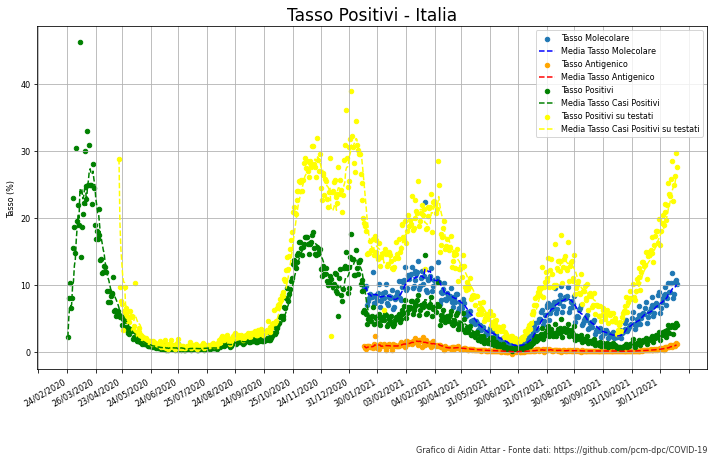

In [289]:
fig, ax = plt.subplots(figsize=(12, 7))

italia.plot(ax=ax, x ='data', y='tasso_molecolare', 
                               kind='scatter', label='Tasso Molecolare',  color='C0')
ax.plot(italia['data'], italia['media_tasso_molecolare'],
        color = 'blue', label = 'Media Tasso Molecolare', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tasso_antigenico_rapido', 
                               kind='scatter', label='Tasso Antigenico',  color='orange')
ax.plot(italia['data'], italia['media_tasso_antigenico_rapido'],
        color = 'red', label = 'Media Tasso Antigenico', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tasso_positivi', 
                               kind='scatter', label='Tasso Positivi',  color='green')
ax.plot(italia['data'], italia['media_tasso_positivi'],
        color = 'green', label = 'Media Tasso Casi Positivi', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tasso_casi', 
                               kind='scatter', label='Tasso Positivi su testati',  color='yellow')
ax.plot(italia['data'], italia['media_tasso_casi'],
        color = 'yellow', label = 'Media Tasso Casi Positivi su testati', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Tasso Positivi - Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Tasso (%)')
ax.set_xlabel("")
ax.legend(loc='best')
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

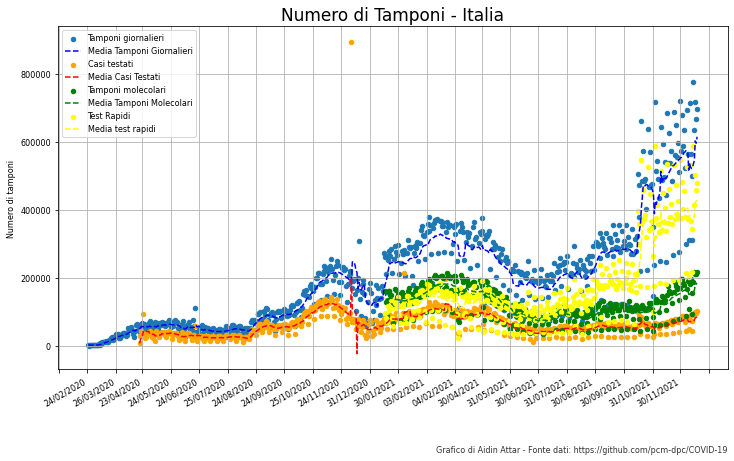

In [287]:
fig, ax = plt.subplots(figsize=(12, 7))

italia.plot(ax=ax, x ='data', y='tamponi_giornalieri', 
                               kind='scatter', label='Tamponi giornalieri',  color='C0')
ax.plot(italia['data'], italia['media_tamponi'],
        color = 'blue', label = 'Media Tamponi Giornalieri', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='casi_testati_giorn', 
                               kind='scatter', label='Casi testati',  color='orange')
ax.plot(italia['data'], italia['media_casi_testati'],
        color = 'red', label = 'Media Casi Testati', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tamponi_test_molecolare_giorn', 
                               kind='scatter', label='Tamponi molecolari',  color='green')
ax.plot(italia['data'], italia['media_tamponi_test_molecolare_giorn'],
        color = 'green', label = 'Media Tamponi Molecolari', linestyle='dashed')
italia.plot(ax=ax, x ='data', y='tamponi_test_antigenico_rapido_giorn', 
                               kind='scatter', label='Test Rapidi',  color='yellow')
ax.plot(italia['data'], italia['media_test_antigenico_rapido_giorn'],
        color = 'yellow', label = 'Media test rapidi', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Numero di Tamponi - Italia', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Numero di tamponi')
ax.set_xlabel("")
ax.legend(loc='best')
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

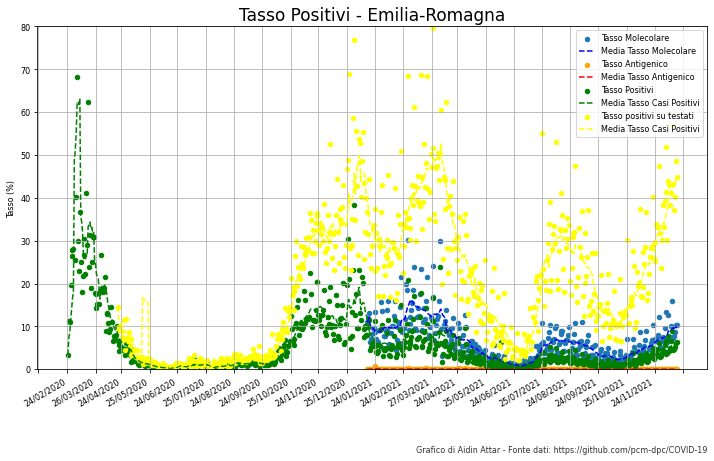

In [293]:
fig, ax = plt.subplots(figsize=(12, 7))

Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='tasso_molecolare', 
                               kind='scatter', label='Tasso Molecolare',  color='C0')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_tasso_molecolare'],
        color = 'blue', label = 'Media Tasso Molecolare', linestyle='dashed')
Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='tasso_antigenico_rapido', 
                               kind='scatter', label='Tasso Antigenico',  color='orange')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_tasso_antigenico_rapido'],
        color = 'red', label = 'Media Tasso Antigenico', linestyle='dashed')
Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='tasso_positivi', 
                               kind='scatter', label='Tasso Positivi',  color='green')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_tasso_positivi'],
        color = 'green', label = 'Media Tasso Casi Positivi', linestyle='dashed')
Regioni['Emilia-Romagna'].plot(ax=ax, x ='data', y='tasso_casi', 
                               kind='scatter', label='Tasso positivi su testati',  color='yellow')
ax.plot(Regioni['Emilia-Romagna']['data'], Regioni['Emilia-Romagna']['media_tasso_casi'],
        color = 'yellow', label = 'Media Tasso Casi Positivi', linestyle='dashed')
fig.autofmt_xdate()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Tasso Positivi - Emilia-Romagna', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid('dotted')
ax.set_ylabel('Tasso (%)')
ax.set_ylim([0,80])
ax.set_xlabel("")
ax.legend(loc='best')
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
plt.show()

In [ ]:


plt.figure()
ax = plt.gca()


italia.plot(ax = ax, x ='data', y='tasso_positivi',
             kind = 'scatter', title = "italia",
             xlabel = '')
italia.plot(ax = ax, x ='data', y='avg_tasso',
             kind = 'line', title = "italia",
             xlabel = '', color = 'orange')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')



#plt.savefig('tasso.png', dpi=400)
plt.show()

In [ ]:
italia['letalità'] = italia['avg_morti'] / italia['avg_casi'].shift(14)
italia

In [ ]:
plt.figure()
ax = plt.gca()


italia.plot(ax = ax, x ='data', y='letalità',
             kind = 'line', title = "italia",
             xlabel = '')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')



#plt.savefig('tasso.png', dpi=400)
plt.show()

In [ ]:
plt.figure()
ax = plt.gca()


italia.plot(ax = ax, x ='data', y='deceduti',
             kind = 'scatter', title = "italia",
             xlabel = '')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')



#plt.savefig('tasso.png', dpi=400)
plt.show()

In [ ]:
#italia.data = pd.to_datetime(italia.data)#, unit='s')
#print(italia)
#italia.groupby(pd.Grouper(key='data', freq='W')).sum()

In [ ]:
%matplotlib inline

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
emr.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "emilia romagna",
         xlabel = '', color = color)
emr.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'bar', title = "emilia romagna",
         xlabel = '', color = 'orange', width=1)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1
emr.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'bar', title = "emilia romagna",
         xlabel = '', color='C0', width = 1)
emr.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line', title = "emilia romagna",
         xlabel = '',  color=color)

ax2.tick_params(axis='y', labelcolor=color)


ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(1, 0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
italia.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "italia",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi')
italia.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'scatter',title = "italia",
         xlabel = '', color = 'orange',
         s = 0.01, marker = 'x',
         label = 'casi')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
italia.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'scatter',title = "italia",
         xlabel = '', color='C0',
         s = 0.1, marker = 'o', label = "decessi")
italia.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line',title = "italia",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

ax1.set_ylim(bottom = 0)
ax2.set_ylim(bottom = 0)

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('italiacontagio.png', dpi = 1000)
plt.show()

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:blue'
italia.plot(ax = ax1, x ='data', y='tamponi_giorno',
         kind = 'bar',title = "italia",
         xlabel = '', color='C0', width = 1, label = "tamponi", alpha = 0.2)
italia.plot(ax = ax1, x ='data', y='avg_tamponi',
         kind = 'line',title = "italia",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'tamponi media')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('tamponi giornalieri', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'

italia.plot(ax = ax2, 
         x ='data', y='avg_tasso',
         kind = 'line', title = "italia",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'tasso medio di positività')
italia.plot(ax = ax2, 
         x ='data', y='tasso_positivi',
         kind = 'scatter',title = "italia",
         xlabel = '', color = 'orange',
         s = 0.1, marker = 'x',
         label = 'tasso giornaliero')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('tasso positività', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best')
ax2.legend(loc='best')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('italiatasso.png', dpi = 1000)
plt.show()

In [ ]:
emr['tamponi_giorno'] = emr['tamponi'] - emr['tamponi'].shift(1)
emr['avg_tamponi']      = emr['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
emr['tasso_positivi'] = emr['casi_giorno'] / emr['tamponi_giorno'] * 100
emr.drop(emr[(emr.tasso_positivi < 0) | (emr.tasso_positivi > 100)].index, inplace=True)
emr['avg_tasso']      = emr['tasso_positivi'].rolling(window=7, min_periods=1).mean()

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:blue'
emr.plot(ax = ax1, x ='data', y='tamponi_giorno',
         kind = 'bar',title = "emilia romagna",
         xlabel = '', color='C0', width = 1, label = "tamponi", alpha = 0.2)
emr.plot(ax = ax1, x ='data', y='avg_tamponi',
         kind = 'line',
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'tamponi media')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('tamponi giornalieri', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'

emr.plot(ax = ax2, 
         x ='data', y='avg_tasso',
         kind = 'line',
         xlabel = '', color = color,
         linewidth = 0.5, label = 'tasso medio di positività')
emr.plot(ax = ax2, 
         x ='data', y='tasso_positivi',
         kind = 'scatter',
         xlabel = '', color = 'orange',
         s = 0.1, marker = 'x',
         label = 'tasso giornaliero')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('tasso positività', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')


ax1.legend(loc='best')
ax2.legend(loc='upper center')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('tasso_EMR.png', dpi = 1000)
plt.show()

In [ ]:
abruzzo = 1312000 / 1000
basilicata = 562869 / 1000
calabria = 1947000 / 1000
campania = 5802000 / 1000
emilia = 4459000 / 1000
friuli = 1215000 / 1000
lazio = 5879000 / 1000
lombardia = 10060000 / 1000
liguria = 1551000 / 1000
marche = 1525000 / 1000
molise = 305617 / 1000
bolzano = 520891 / 1000
trento = 538223 / 1000
piemonte = 4356000 / 1000
puglia = 4029000 / 1000
sardegna = 1640000 / 1000
sicilia = 5000000 / 1000
toscana = 3730000 / 1000
umbria = 882015 / 1000
valle = 125666 / 1000
veneto = 4906000 / 1000


emr = regione_grouped.get_group('Emilia-Romagna')
ven = regione_grouped.get_group('Veneto')
abr = regione_grouped.get_group('Abruzzo')
bas = regione_grouped.get_group('Basilicata')
cal = regione_grouped.get_group('Calabria')
cam = regione_grouped.get_group('Campania')
fvg = regione_grouped.get_group('Friuli Venezia Giulia')
laz = regione_grouped.get_group('Lazio')
lom = regione_grouped.get_group('Lombardia')
mar = regione_grouped.get_group('Marche')
lig = regione_grouped.get_group('Liguria')
mol = regione_grouped.get_group('Molise')
pab = regione_grouped.get_group('P.A. Bolzano')
pat = regione_grouped.get_group('P.A. Trento')
pie = regione_grouped.get_group('Piemonte')
pug = regione_grouped.get_group('Puglia')
sar = regione_grouped.get_group('Sardegna')
sic = regione_grouped.get_group('Sicilia')
tos = regione_grouped.get_group('Toscana')
umb = regione_grouped.get_group('Umbria')
vda = regione_grouped.get_group("Valle d'Aosta")



abr['tamponi_mille'] = abr['tamponi'] / abruzzo
abr['totale_casi_mille'] = abr['totale_casi'] / abruzzo
abr['deceduti_mille'] = abr['deceduti'] / abruzzo

bas['tamponi_mille'] = bas['tamponi'] / basilicata
bas['totale_casi_mille'] = bas['totale_casi']  / basilicata
bas['deceduti_mille'] = bas['deceduti'] / basilicata

cal['tamponi_mille'] = cal['tamponi'] / calabria
cal['totale_casi_mille'] = cal['totale_casi'] / calabria
cal['deceduti_mille'] = cal['deceduti'] / calabria

cam['tamponi_mille'] = cam['tamponi'] / campania
cam['totale_casi_mille'] = cam['totale_casi'] / campania
cam['deceduti_mille'] = cam['deceduti'] / campania

emr['tamponi_mille'] = emr['tamponi'] / emilia
emr['totale_casi_mille'] = emr['totale_casi'] / emilia
emr['deceduti_mille'] = emr['deceduti'] / emilia

fvg['tamponi_mille'] = fvg['tamponi'] / friuli
fvg['totale_casi_mille'] = fvg['totale_casi'] / friuli
fvg['deceduti_mille'] = fvg['deceduti'] / friuli

laz['tamponi_mille'] = laz['tamponi'] / lazio
laz['totale_casi_mille'] = laz['totale_casi'] / lazio
laz['deceduti_mille'] = laz['deceduti'] / lazio

lig['tamponi_mille'] = lig['tamponi'] / liguria
lig['totale_casi_mille'] = lig['totale_casi'] / liguria
lig['deceduti_mille'] = lig['deceduti'] / liguria

lom['tamponi_mille'] = lom['tamponi'] / lombardia
lom['totale_casi_mille'] = lom['totale_casi'] / lombardia
lom['deceduti_mille'] = lom['deceduti'] / lombardia

mar['tamponi_mille'] = mar['tamponi'] / marche
mar['totale_casi_mille'] = mar['totale_casi'] / marche
mar['deceduti_mille'] = mar['deceduti'] / marche

mol['tamponi_mille'] = mol['tamponi'] / molise
mol['totale_casi_mille'] = mol['totale_casi'] / molise
mol['deceduti_mille'] = mol['deceduti'] / molise

pab['tamponi_mille'] = pab['tamponi'] / bolzano
pab['totale_casi_mille'] = pab['totale_casi'] / bolzano
pab['deceduti_mille'] = pab['deceduti'] / bolzano

pat['tamponi_mille'] = pat['tamponi'] / trento
pat['totale_casi_mille'] = pat['totale_casi'] / trento
pat['deceduti_mille'] = pat['deceduti'] / trento

pie['tamponi_mille'] = pie['tamponi'] / piemonte
pie['totale_casi_mille'] = pie['totale_casi'] / piemonte
pie['deceduti_mille'] = pie['deceduti'] / piemonte

pug['tamponi_mille'] = pug['tamponi'] / puglia
pug['totale_casi_mille'] = pug['totale_casi'] / puglia
pug['deceduti_mille'] = pug['deceduti'] / puglia

sar['tamponi_mille'] = sar['tamponi'] / sardegna
sar['totale_casi_mille'] = sar['totale_casi'] / sardegna
sar['deceduti_mille'] = sar['deceduti'] / sardegna

sic['tamponi_mille'] = sic['tamponi'] / sicilia
sic['totale_casi_mille'] = sic['totale_casi'] / sicilia
sic['deceduti_mille'] = sic['deceduti'] / sicilia

tos['tamponi_mille'] = tos['tamponi'] / toscana
tos['totale_casi_mille'] = tos['totale_casi'] / toscana
tos['deceduti_mille'] = tos['deceduti'] / toscana

umb['tamponi_mille'] = umb['tamponi'] / umbria
umb['totale_casi_mille'] = umb['totale_casi'] / umbria
umb['deceduti_mille'] = umb['deceduti'] / umbria

ven['tamponi_mille'] = ven['tamponi'] / veneto
ven['totale_casi_mille'] = ven['totale_casi'] / veneto
ven['deceduti_mille'] = ven['deceduti'] / veneto


vda['tamponi_mille'] = vda['tamponi'] / valle
vda['totale_casi_mille'] = vda['totale_casi'] / valle
vda['deceduti_mille'] = vda['deceduti'] / valle


emr['casi_giorno'] = emr['totale_casi_mille'] - emr['totale_casi_mille'].shift(1)
emr['morti_giorno'] = emr['deceduti_mille'] - emr['deceduti_mille'].shift(1)
emr['avg_morti']     = emr['morti_giorno'].rolling(window=7, min_periods=1).mean()
emr['avg_casi']         = emr['casi_giorno'].rolling(window=7, min_periods=1).mean()
emr['tamponi_giorno'] = emr['tamponi_mille'] - emr['tamponi_mille'].shift(1)
emr['avg_tamponi']      = emr['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
emr['tasso_positivi'] = emr['casi_giorno'] / emr['tamponi_giorno'] * 100
emr.drop(emr[(emr.tasso_positivi < 0) | (emr.tasso_positivi > 100)].index, inplace=True)
emr['avg_tasso']      = emr['tasso_positivi'].rolling(window=7, min_periods=1).mean()

ven['casi_giorno'] = ven['totale_casi_mille'] - ven['totale_casi_mille'].shift(1)
ven['avg_casi']         = ven['casi_giorno'].rolling(window=7, min_periods=1).mean()
ven['morti_giorno'] = ven['deceduti_mille'] - ven['deceduti_mille'].shift(1)
ven['avg_morti']     = ven['morti_giorno'].rolling(window=7, min_periods=1).mean()
ven['tamponi_giorno'] = ven['tamponi_mille'] - ven['tamponi_mille'].shift(1)
ven['avg_tamponi']      = ven['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
ven['tasso_positivi'] = ven['casi_giorno'] / ven['tamponi_giorno'] * 100
ven.drop(ven[(ven.tasso_positivi < 0) | (ven.tasso_positivi > 100)].index, inplace=True)
ven['avg_tasso']      = ven['tasso_positivi'].rolling(window=7, min_periods=1).mean()

abr['casi_giorno'] = abr['totale_casi_mille'] - abr['totale_casi_mille'].shift(1)
abr['avg_casi']         = abr['casi_giorno'].rolling(window=7, min_periods=1).mean()
abr['morti_giorno'] = abr['deceduti_mille'] - abr['deceduti_mille'].shift(1)
abr['avg_morti']     = abr['morti_giorno'].rolling(window=7, min_periods=1).mean()
abr['tamponi_giorno'] = abr['tamponi_mille'] - abr['tamponi_mille'].shift(1)
abr['avg_tamponi']      = abr['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
abr['tasso_positivi'] = abr['casi_giorno'] / abr['tamponi_giorno'] * 100
abr.drop(abr[(abr.tasso_positivi < 0) | (abr.tasso_positivi > 100)].index, inplace=True)
abr['avg_tasso']      = abr['tasso_positivi'].rolling(window=7, min_periods=1).mean()

bas['casi_giorno'] = bas['totale_casi_mille'] - bas['totale_casi_mille'].shift(1)
bas['avg_casi']         = bas['casi_giorno'].rolling(window=7, min_periods=1).mean()
bas['morti_giorno'] = bas['deceduti_mille'] - bas['deceduti_mille'].shift(1)
bas['avg_morti']     = bas['morti_giorno'].rolling(window=7, min_periods=1).mean()
bas['tamponi_giorno'] = bas['tamponi_mille'] - bas['tamponi_mille'].shift(1)
bas['avg_tamponi']      = bas['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
bas['tasso_positivi'] = bas['casi_giorno'] / bas['tamponi_giorno'] * 100
bas.drop(bas[(bas.tasso_positivi < 0) | (bas.tasso_positivi > 100)].index, inplace=True)
bas['avg_tasso']      = bas['tasso_positivi'].rolling(window=7, min_periods=1).mean()


cal['casi_giorno'] = cal['totale_casi_mille'] - cal['totale_casi_mille'].shift(1)
cal['avg_casi']         = cal['casi_giorno'].rolling(window=7, min_periods=1).mean()
cal['morti_giorno'] = cal['deceduti_mille'] - cal['deceduti_mille'].shift(1)
cal['avg_morti']     = cal['morti_giorno'].rolling(window=7, min_periods=1).mean()
cal['tamponi_giorno'] = cal['tamponi_mille'] - cal['tamponi_mille'].shift(1)
cal['avg_tamponi']      = cal['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
cal['tasso_positivi'] = cal['casi_giorno'] / cal['tamponi_giorno'] * 100
cal.drop(cal[(cal.tasso_positivi < 0) | (cal.tasso_positivi > 100)].index, inplace=True)
cal['avg_tasso']      = cal['tasso_positivi'].rolling(window=7, min_periods=1).mean()


cam['casi_giorno'] = cam['totale_casi_mille'] - cam['totale_casi_mille'].shift(1)
cam['avg_casi']         = cam['casi_giorno'].rolling(window=7, min_periods=1).mean()
cam['morti_giorno'] = cam['deceduti_mille'] - cam['deceduti_mille'].shift(1)
cam['avg_morti']     = cam['morti_giorno'].rolling(window=7, min_periods=1).mean()
cam['tamponi_giorno'] = cam['tamponi_mille'] - cam['tamponi_mille'].shift(1)
cam['avg_tamponi']      = cam['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
cam['tasso_positivi'] = cam['casi_giorno'] / cam['tamponi_giorno'] * 100
cam.drop(cam[(cam.tasso_positivi < 0) | (cam.tasso_positivi > 100)].index, inplace=True)
cam['avg_tasso']      = cam['tasso_positivi'].rolling(window=7, min_periods=1).mean()


fvg['casi_giorno'] = fvg['totale_casi_mille'] - fvg['totale_casi_mille'].shift(1)
fvg['avg_casi']         = fvg['casi_giorno'].rolling(window=7, min_periods=1).mean()
fvg['morti_giorno'] = fvg['deceduti_mille'] - fvg['deceduti_mille'].shift(1)
fvg['avg_morti']     = fvg['morti_giorno'].rolling(window=7, min_periods=1).mean()
fvg['tamponi_giorno'] = fvg['tamponi_mille'] - fvg['tamponi_mille'].shift(1)
fvg['avg_tamponi']      = fvg['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
fvg['tasso_positivi'] = fvg['casi_giorno'] / fvg['tamponi_giorno'] * 100
fvg.drop(fvg[(fvg.tasso_positivi < 0) | (fvg.tasso_positivi > 100)].index, inplace=True)
fvg['avg_tasso']      = fvg['tasso_positivi'].rolling(window=7, min_periods=1).mean() 	

laz['casi_giorno'] = laz['totale_casi_mille'] - laz['totale_casi_mille'].shift(1)
laz['avg_casi']         = laz['casi_giorno'].rolling(window=7, min_periods=1).mean()
laz['morti_giorno'] = laz['deceduti_mille'] - laz['deceduti_mille'].shift(1)
laz['avg_morti']     = laz['morti_giorno'].rolling(window=7, min_periods=1).mean()
laz['tamponi_giorno'] = laz['tamponi_mille'] - laz['tamponi_mille'].shift(1)
laz['avg_tamponi']      = laz['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
laz['tasso_positivi'] = laz['casi_giorno'] / laz['tamponi_giorno'] * 100
laz.drop(laz[(laz.tasso_positivi < 0) | (laz.tasso_positivi > 100)].index, inplace=True)
laz['avg_tasso']      = laz['tasso_positivi'].rolling(window=7, min_periods=1).mean()

lom['casi_giorno'] = lom['totale_casi_mille'] - lom['totale_casi_mille'].shift(1)
lom['avg_casi']         = lom['casi_giorno'].rolling(window=7, min_periods=1).mean()
lom['morti_giorno'] = lom['deceduti_mille'] - lom['deceduti_mille'].shift(1)
lom['avg_morti']     = lom['morti_giorno'].rolling(window=7, min_periods=1).mean()
lom['tamponi_giorno'] = lom['tamponi_mille'] - lom['tamponi_mille'].shift(1)
lom['avg_tamponi']      = lom['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
lom['tasso_positivi'] = lom['casi_giorno'] / lom['tamponi_giorno'] * 100
lom.drop(lom[(lom.tasso_positivi < 0) | (lom.tasso_positivi > 100)].index, inplace=True)
lom['avg_tasso']      = lom['tasso_positivi'].rolling(window=7, min_periods=1).mean()

lig['casi_giorno'] = lig['totale_casi_mille'] - lig['totale_casi_mille'].shift(1)
lig['avg_casi']         = lig['casi_giorno'].rolling(window=7, min_periods=1).mean()
lig['morti_giorno'] = lig['deceduti_mille'] - lig['deceduti_mille'].shift(1)
lig['avg_morti']     = lig['morti_giorno'].rolling(window=7, min_periods=1).mean()
lig['tamponi_giorno'] = lig['tamponi_mille'] - lig['tamponi_mille'].shift(1)
lig['avg_tamponi']      = lig['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
lig['tasso_positivi'] = lig['casi_giorno'] / lig['tamponi_giorno'] * 100
lig.drop(lig[(lig.tasso_positivi < 0) | (lig.tasso_positivi > 100)].index, inplace=True)
lig['avg_tasso']      = lig['tasso_positivi'].rolling(window=7, min_periods=1).mean()

mar['casi_giorno'] = mar['totale_casi_mille'] - mar['totale_casi_mille'].shift(1)
mar['avg_casi']         = mar['casi_giorno'].rolling(window=7, min_periods=1).mean()
mar['morti_giorno'] = mar['deceduti_mille'] - mar['deceduti_mille'].shift(1)
mar['avg_morti']     = mar['morti_giorno'].rolling(window=7, min_periods=1).mean()
mar['tamponi_giorno'] = mar['tamponi_mille'] - mar['tamponi_mille'].shift(1)
mar['avg_tamponi']      = mar['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
mar['tasso_positivi'] = mar['casi_giorno'] / mar['tamponi_giorno'] * 100
mar.drop(mar[(mar.tasso_positivi < 0) | (mar.tasso_positivi > 100)].index, inplace=True)
mar['avg_tasso']      = mar['tasso_positivi'].rolling(window=7, min_periods=1).mean()

mol['casi_giorno'] = mol['totale_casi_mille'] - mol['totale_casi_mille'].shift(1)
mol['avg_casi']         = mol['casi_giorno'].rolling(window=7, min_periods=1).mean()
mol['morti_giorno'] = mol['deceduti_mille'] - mol['deceduti_mille'].shift(1)
mol['avg_morti']     = mol['morti_giorno'].rolling(window=7, min_periods=1).mean()
mol['tamponi_giorno'] = mol['tamponi_mille'] - mol['tamponi_mille'].shift(1)
mol['avg_tamponi']      = mol['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
mol['tasso_positivi'] = mol['casi_giorno'] / mol['tamponi_giorno'] * 100
mol.drop(mol[(mol.tasso_positivi < 0) | (mol.tasso_positivi > 100)].index, inplace=True)
mol['avg_tasso']      = mol['tasso_positivi'].rolling(window=7, min_periods=1).mean()

pab['casi_giorno'] = pab['totale_casi_mille'] - pab['totale_casi_mille'].shift(1)
pab['avg_casi']         = pab['casi_giorno'].rolling(window=7, min_periods=1).mean()
pab['morti_giorno'] = pab['deceduti_mille'] - pab['deceduti_mille'].shift(1)
pab['avg_morti']     = pab['morti_giorno'].rolling(window=7, min_periods=1).mean()
pab['tamponi_giorno'] = pab['tamponi_mille'] - pab['tamponi_mille'].shift(1)
pab['avg_tamponi']      = pab['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
pab['tasso_positivi'] = pab['casi_giorno'] / pab['tamponi_giorno'] * 100
pab.drop(pab[(pab.tasso_positivi < 0) | (pab.tasso_positivi > 100)].index, inplace=True)
pab['avg_tasso']      = pab['tasso_positivi'].rolling(window=7, min_periods=1).mean()

pat['casi_giorno'] = pat['totale_casi_mille'] - pat['totale_casi_mille'].shift(1)
pat.drop(pat[pat.casi_giorno < 0].index, inplace=True)
pat['avg_casi']         = pat['casi_giorno'].rolling(window=7, min_periods=1).mean()
pat['morti_giorno'] = pat['deceduti_mille'] - pat['deceduti_mille'].shift(1)
pat.drop(pat[pat.morti_giorno < 0].index, inplace=True)
pat['avg_morti']     = pat['morti_giorno'].rolling(window=7, min_periods=1).mean()
pat['tamponi_giorno'] = pat['tamponi_mille'] - pat['tamponi_mille'].shift(1)
pat['avg_tamponi']      = pat['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
pat['tasso_positivi'] = pat['casi_giorno'] / pat['tamponi_giorno'] * 100
pat.drop(pat[(pat.tasso_positivi < 0) | (pat.tasso_positivi > 100)].index, inplace=True)
pat['avg_tasso']      = pat['tasso_positivi'].rolling(window=7, min_periods=1).mean()

pie['casi_giorno'] = pie['totale_casi_mille'] - pie['totale_casi_mille'].shift(1)
pie['avg_casi']         = pie['casi_giorno'].rolling(window=7, min_periods=1).mean()
pie['morti_giorno'] = pie['deceduti_mille'] - pie['deceduti_mille'].shift(1)
pie['avg_morti']     = pie['morti_giorno'].rolling(window=7, min_periods=1).mean()
pie['tamponi_giorno'] = pie['tamponi_mille'] - pie['tamponi_mille'].shift(1)
pie.drop(pie[(pie.tamponi_giorno < 0)].index, inplace=True)
pie['avg_tamponi']      = pie['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
pie['tasso_positivi'] = pie['casi_giorno'] / pie['tamponi_giorno'] * 100
pie.drop(pie[(pie.tasso_positivi < 0) | (pie.tasso_positivi > 100)].index, inplace=True)
pie['avg_tasso']      = pie['tasso_positivi'].rolling(window=7, min_periods=1).mean()

pug['casi_giorno'] = pug['totale_casi_mille'] - pug['totale_casi_mille'].shift(1)
pug['avg_casi']         = pug['casi_giorno'].rolling(window=7, min_periods=1).mean()
pug['morti_giorno'] = pug['deceduti_mille'] - pug['deceduti_mille'].shift(1)
pug['avg_morti']     = pug['morti_giorno'].rolling(window=7, min_periods=1).mean()
pug['tamponi_giorno'] = pug['tamponi_mille'] - pug['tamponi_mille'].shift(1)
pug['avg_tamponi']      = pug['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
pug['tasso_positivi'] = pug['casi_giorno'] / pug['tamponi_giorno'] * 100
pug.drop(pug[(pug.tasso_positivi < 0) | (pug.tasso_positivi > 100)].index, inplace=True)
pug['avg_tasso']      = pug['tasso_positivi'].rolling(window=7, min_periods=1).mean()

sar['casi_giorno'] = sar['totale_casi_mille'] - sar['totale_casi_mille'].shift(1)
sar['avg_casi']         = sar['casi_giorno'].rolling(window=7, min_periods=1).mean()
sar['morti_giorno'] = sar['deceduti_mille'] - sar['deceduti_mille'].shift(1)
sar['avg_morti']     = sar['morti_giorno'].rolling(window=7, min_periods=1).mean()
sar['tamponi_giorno'] = sar['tamponi_mille'] - sar['tamponi_mille'].shift(1)
sar['avg_tamponi']      = sar['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
sar['tasso_positivi'] = sar['casi_giorno'] / sar['tamponi_giorno'] * 100
sar.drop(sar[(sar.tasso_positivi < 0) | (sar.tasso_positivi > 100)].index, inplace=True)
sar['avg_tasso']      = sar['tasso_positivi'].rolling(window=7, min_periods=1).mean()

sic['casi_giorno'] = sic['totale_casi_mille'] - sic['totale_casi_mille'].shift(1)
sic['avg_casi']         = sic['casi_giorno'].rolling(window=7, min_periods=1).mean()
sic['morti_giorno'] = sic['deceduti_mille'] - sic['deceduti_mille'].shift(1)
sic['avg_morti']     = sic['morti_giorno'].rolling(window=7, min_periods=1).mean()
sic['tamponi_giorno'] = sic['tamponi_mille'] - sic['tamponi_mille'].shift(1)
sic['avg_tamponi']      = sic['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
sic['tasso_positivi'] = sic['casi_giorno'] / sic['tamponi_giorno'] * 100
sic.drop(sic[(sic.tasso_positivi < 0) | (sic.tasso_positivi > 100)].index, inplace=True)
sic['avg_tasso']      = sic['tasso_positivi'].rolling(window=7, min_periods=1).mean()

tos['casi_giorno'] = tos['totale_casi_mille'] - tos['totale_casi_mille'].shift(1)
tos['avg_casi']         = tos['casi_giorno'].rolling(window=7, min_periods=1).mean()
tos['morti_giorno'] = tos['deceduti_mille'] - tos['deceduti_mille'].shift(1)
tos['avg_morti']     = tos['morti_giorno'].rolling(window=7, min_periods=1).mean()
tos['tamponi_giorno'] = tos['tamponi_mille'] - tos['tamponi_mille'].shift(1)
tos['avg_tamponi']      = tos['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
tos['tasso_positivi'] = tos['casi_giorno'] / tos['tamponi_giorno'] * 100
tos.drop(tos[(tos.tasso_positivi < 0) | (tos.tasso_positivi > 100)].index, inplace=True)
tos['avg_tasso']      = tos['tasso_positivi'].rolling(window=7, min_periods=1).mean()

umb['casi_giorno'] = umb['totale_casi_mille'] - umb['totale_casi_mille'].shift(1)
umb['avg_casi']         = umb['casi_giorno'].rolling(window=7, min_periods=1).mean()
umb['morti_giorno'] = umb['deceduti_mille'] - umb['deceduti_mille'].shift(1)
umb['avg_morti']     = umb['morti_giorno'].rolling(window=7, min_periods=1).mean()
umb['tamponi_giorno'] = umb['tamponi_mille'] - umb['tamponi_mille'].shift(1)
umb['avg_tamponi']      = umb['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
umb['tasso_positivi'] = umb['casi_giorno'] / umb['tamponi_giorno'] * 100
umb.drop(umb[(umb.tasso_positivi < 0) | (umb.tasso_positivi > 100)].index, inplace=True)
umb['avg_tasso']      = umb['tasso_positivi'].rolling(window=7, min_periods=1).mean()

vda['casi_giorno'] = vda['totale_casi_mille'] - vda['totale_casi_mille'].shift(1)
vda['avg_casi']         = vda['casi_giorno'].rolling(window=7, min_periods=1).mean()
vda['morti_giorno'] = vda['deceduti_mille'] - vda['deceduti_mille'].shift(1)
vda['avg_morti']     = vda['morti_giorno'].rolling(window=7, min_periods=1).mean()
vda['tamponi_giorno'] = vda['tamponi_mille'] - vda['tamponi_mille'].shift(1)
vda.drop(vda[(vda.tamponi_giorno < 0)].index, inplace=True)
vda['avg_tamponi']      = vda['tamponi_giorno'].rolling(window=7, min_periods=1).mean()
vda['tasso_positivi'] = vda['casi_giorno'] / vda['tamponi_giorno'] * 100
vda.drop(vda[(vda.tasso_positivi < 0) | (vda.tasso_positivi > 100)].index, inplace=True)
vda['avg_tasso']      = vda['tasso_positivi'].rolling(window=7, min_periods=1).mean()





In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})

abr.plot(ax=axes[0,0],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "ABR", width = 1)
bas.plot(ax=axes[0,1],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "BAS", width = 1)
cal.plot(ax=axes[0,2],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "CAL", width = 1)
cam.plot(ax=axes[0,3],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "CAM", width = 1)
emr.plot(ax=axes[0,4],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "EMR", width = 1)
fvg.plot(ax=axes[0,5],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "FVG", width = 1)
laz.plot(ax=axes[0,6],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "LAZ", width = 1)
lig.plot(ax=axes[1,0],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "LIG", width = 1)
lom.plot(ax=axes[1,1],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "LOM", width = 1)
mar.plot(ax=axes[1,2],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "MAR", width = 1)
mol.plot(ax=axes[1,3],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "MOL", width = 1)
pab.plot(ax=axes[1,4],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "PAB", width = 1)
pat.plot(ax=axes[1,5],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "PAT", width = 1)
pie.plot(ax=axes[1,6],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "PIE", width = 1)
pug.plot(ax=axes[2,0],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "PUG", width = 1)
sar.plot(ax=axes[2,1],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "SAR", width = 1)
sic.plot(ax=axes[2,2],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "SIC", width = 1)
tos.plot(ax=axes[2,3],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "TOS", width = 1)
umb.plot(ax=axes[2,4],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "UMB", width = 1)
vda.plot(ax=axes[2,5],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "VDA", width = 1)
ven.plot(ax=axes[2,6],x ='data', y='tamponi_mille', kind = 'bar', legend = False, xlabel = '', title = "VEN", width = 1)


axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))


plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
fig.suptitle("Tamponi fatti per 1000 abitanti", fontsize=10)

plt.savefig('Regioni_Tamp_Tot.png', dpi=300)

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})

abr.plot(ax=axes[0,0],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "ABR", width = 1)
bas.plot(ax=axes[0,1],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "BAS", width = 1)
cal.plot(ax=axes[0,2],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "CAL", width = 1)
cam.plot(ax=axes[0,3],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "CAM", width = 1)
emr.plot(ax=axes[0,4],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "EMR", width = 1)
fvg.plot(ax=axes[0,5],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "FVG", width = 1)
laz.plot(ax=axes[0,6],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "LAZ", width = 1)
lig.plot(ax=axes[1,0],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "LIG", width = 1)
lom.plot(ax=axes[1,1],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "LOM", width = 1)
mar.plot(ax=axes[1,2],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "MAR", width = 1)
mol.plot(ax=axes[1,3],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "MOL", width = 1)
pab.plot(ax=axes[1,4],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "PAB", width = 1)
pat.plot(ax=axes[1,5],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "PAT", width = 1)
pie.plot(ax=axes[1,6],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "PIE", width = 1)
pug.plot(ax=axes[2,0],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "PUG", width = 1)
sar.plot(ax=axes[2,1],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "SAR", width = 1)
sic.plot(ax=axes[2,2],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "SIC", width = 1)
tos.plot(ax=axes[2,3],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "TOS", width = 1)
umb.plot(ax=axes[2,4],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "UMB", width = 1)
vda.plot(ax=axes[2,5],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "VDA", width = 1)
ven.plot(ax=axes[2,6],x ='data', y='tamponi_giorno', kind = 'bar', legend = False, xlabel = '', title = "VEN", width = 1)


abr.plot(ax=axes[0,0],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "ABR", color = 'orange')
bas.plot(ax=axes[0,1],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "BAS", color = 'orange')
cal.plot(ax=axes[0,2],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "CAL", color = 'orange')
cam.plot(ax=axes[0,3],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "CAM", color = 'orange')
emr.plot(ax=axes[0,4],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "EMR", color = 'orange')
fvg.plot(ax=axes[0,5],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "FVG", color = 'orange')
laz.plot(ax=axes[0,6],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "LAZ", color = 'orange')
lig.plot(ax=axes[1,0],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "LIG", color = 'orange')
lom.plot(ax=axes[1,1],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "LOM", color = 'orange')
mar.plot(ax=axes[1,2],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "MAR", color = 'orange')
mol.plot(ax=axes[1,3],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "MOL", color = 'orange')
pab.plot(ax=axes[1,4],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "PAB", color = 'orange')
pat.plot(ax=axes[1,5],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "PAT", color = 'orange')
pie.plot(ax=axes[1,6],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "PIE", color = 'orange')
pug.plot(ax=axes[2,0],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "PUG", color = 'orange')
sar.plot(ax=axes[2,1],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "SAR", color = 'orange')
sic.plot(ax=axes[2,2],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "SIC", color = 'orange')
tos.plot(ax=axes[2,3],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "TOS", color = 'orange')
umb.plot(ax=axes[2,4],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "UMB", color = 'orange')
vda.plot(ax=axes[2,5],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "VDA", color = 'orange')
ven.plot(ax=axes[2,6],x ='data', y='avg_tamponi', kind = 'line', legend = False, xlabel = '', title = "VEN", color = 'orange')


#axes2 = axes.twinx()  # instantiate a second axes that shares the same x-axis


axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
fig.suptitle("Tamponi fatti per 1000 abitanti", fontsize=10)

plt.savefig('Regioni_Cons_Tot.png', dpi=300)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})


axes[0,0].plot(abr.data, abr.avg_tasso)
axes[0,1].plot(bas.data, bas.avg_tasso, )
axes[0,2].plot(cal.data, cal.avg_tasso, )
axes[0,3].plot(cam.data, cam.avg_tasso, )
axes[0,4].plot(emr.data, emr.avg_tasso, )
axes[0,5].plot(fvg.data, fvg.avg_tasso, )
axes[0,6].plot(laz.data, laz.avg_tasso, )
axes[1,0].plot(lig.data, lig.avg_tasso, )
axes[1,1].plot(lom.data, lom.avg_tasso, )
axes[1,2].plot(mar.data, mar.avg_tasso, )
axes[1,3].plot(mol.data, mol.avg_tasso, )
axes[1,4].plot(pab.data, pab.avg_tasso, )
axes[1,5].plot(pat.data, pat.avg_tasso, )
axes[1,6].plot(pie.data, pie.avg_tasso, )
axes[2,0].plot(pug.data, pug.avg_tasso, )
axes[2,1].plot(sar.data, sar.avg_tasso, )
axes[2,2].plot(sic.data, sic.avg_tasso, )
axes[2,3].plot(tos.data, tos.avg_tasso, )
axes[2,4].plot(umb.data, umb.avg_tasso, )
axes[2,5].plot(vda.data, vda.avg_tasso, )
axes[2,6].plot(ven.data, ven.avg_tasso, )

#axes2 = axes.twinx()  # instantiate a second axes that shares the same x-axis


axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
fig.suptitle("Tasso di positività", fontsize=10)

plt.savefig('Regioni_Tasso.png', dpi=300)

In [ ]:
"""fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})

abr.plot(ax=axes[0,0],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "ABR", color = 'orange')
bas.plot(ax=axes[0,1],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "BAS", color = 'orange')
cal.plot(ax=axes[0,2],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "CAL", color = 'orange')
cam.plot(ax=axes[0,3],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "CAM", color = 'orange')
emr.plot(ax=axes[0,4],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "EMR", color = 'orange')
fvg.plot(ax=axes[0,5],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "FVG", color = 'orange')
laz.plot(ax=axes[0,6],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "LAZ", color = 'orange')
lig.plot(ax=axes[1,0],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "LIG", color = 'orange')
lom.plot(ax=axes[1,1],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "LOM", color = 'orange')
mar.plot(ax=axes[1,2],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "MAR", color = 'orange')
mol.plot(ax=axes[1,3],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "MOL", color = 'orange')
pab.plot(ax=axes[1,4],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "PAB", color = 'orange')
pat.plot(ax=axes[1,5],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "PAT", color = 'orange')
pie.plot(ax=axes[1,6],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "PIE", color = 'orange')
pug.plot(ax=axes[2,0],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "PUG", color = 'orange')
sar.plot(ax=axes[2,1],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "SAR", color = 'orange')
sic.plot(ax=axes[2,2],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "SIC", color = 'orange')
tos.plot(ax=axes[2,3],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "TOS", color = 'orange')
umb.plot(ax=axes[2,4],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "UMB", color = 'orange')
vda.plot(ax=axes[2,5],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "VDA", color = 'orange')
ven.plot(ax=axes[2,6],x ='data', y='avg_casi', kind = 'line', legend = False, xlabel = '', title = "VEN", color = 'orange')

axes200 = axes[0,0].twinx()
axes201 = axes[0,1].twinx()
axes202 = axes[0,2].twinx()
axes203 = axes[0,3].twinx()
axes204 = axes[0,4].twinx()
axes205 = axes[0,5].twinx()
axes206 = axes[0,6].twinx()
axes210 = axes[1,0].twinx()
axes211 = axes[1,1].twinx()
axes212 = axes[1,2].twinx()
axes213 = axes[1,3].twinx()
axes214 = axes[1,4].twinx()
axes215 = axes[1,5].twinx()
axes216 = axes[1,6].twinx()
axes220 = axes[2,0].twinx()
axes221 = axes[2,1].twinx()
axes222 = axes[2,2].twinx()
axes223 = axes[2,3].twinx()
axes224 = axes[2,4].twinx()
axes225 = axes[2,5].twinx()
axes226 = axes[2,6].twinx()


axes226.get_shared_y_axes().join(axes200,
                                 axes201,
                                 axes202,
                                 axes203,
                                 axes204,
                                 axes205,
                                 axes206,
                                 axes210,
                                 axes211,
                                 axes212,
                                 axes213,
                                 axes214,
                                 axes215,
                                 axes216,
                                 axes220,
                                 axes221,
                                 axes222,
                                 axes223,
                                 axes224,
                                 axes225,
                                 axes226)
axes200.yaxis.set_tick_params(labelright=False)
axes210.yaxis.set_tick_params(labelright=False)
axes220.yaxis.set_tick_params(labelright=False)
axes206.yaxis.set_tick_params(labelright=True)


abr.plot(ax=axes200,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
bas.plot(ax=axes201,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
cal.plot(ax=axes202,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
cam.plot(ax=axes203,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
emr.plot(ax=axes204,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
fvg.plot(ax=axes205,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
laz.plot(ax=axes206,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
lig.plot(ax=axes210,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
lom.plot(ax=axes211,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
mar.plot(ax=axes212,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
mol.plot(ax=axes213,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
pab.plot(ax=axes214,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
pat.plot(ax=axes215,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
pie.plot(ax=axes216,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
pug.plot(ax=axes220,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
sar.plot(ax=axes221,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
sic.plot(ax=axes222,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
tos.plot(ax=axes223,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
umb.plot(ax=axes224,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
vda.plot(ax=axes225,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')
ven.plot(ax=axes226,x ='data', y='avg_morti', kind = 'line', legend = False, xlabel = '', color = 'C0')


axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
fig.suptitle("Tamponi fatti per 1000 abitanti", fontsize=10)

#plt.savefig('Regioni_Cons_Tot.png', dpi=300)"""

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
pab.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "pab",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi')
pab.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'scatter',title = "pab",
         xlabel = '', color = 'orange',
         s = 0.01, marker = 'x',
         label = 'casi')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
pab.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'scatter',title = "pab",
         xlabel = '', color='C0',
         s = 0.1, marker = 'o', label = "decessi")
pab.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line',title = "pab",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')



ax1.legend(loc='best')
ax2.legend(loc='best')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('prova.png', dpi = 1000)
plt.show()

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
pat.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "pat",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi')
pat.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'scatter',title = "pat",
         xlabel = '', color = 'orange',
         s = 0.01, marker = 'x',
         label = 'casi')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
pat.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'scatter',title = "pat",
         xlabel = '', color='C0',
         s = 0.1, marker = 'o', label = "decessi")
pat.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line',title = "pat",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best')
ax2.legend(loc='best')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('prova.png', dpi = 1000)
plt.show()

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
emr.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "emr",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi')
emr.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'scatter',title = "emr",
         xlabel = '', color = 'orange',
         s = 0.01, marker = 'x',
         label = 'casi')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
emr.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'scatter',title = "emr",
         xlabel = '', color='C0',
         s = 0.1, marker = 'o', label = "decessi")
emr.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line',title = "emr",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')


ax1.legend(loc='best')
ax2.legend(loc='best')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('casi_morti_EMR.png', dpi = 1000)
plt.show()

In [ ]:
emr['rapp_casi'] = emr['avg_casi'] / emr['avg_casi'].shift(7)
emr['rapp_morti'] = emr['avg_morti'] / emr['avg_morti'].shift(7)

In [ ]:
"""%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
emr.plot(ax = ax1, 
         x ='data', y='rapp_casi',
         kind = 'scatter', title = "emr",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi', )
ax1.tick_params(axis='y', labelcolor=color)
plt.xlim(left = datetime.date(2020, 8, 1))

plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
emr.plot(ax = ax2, x ='data', y='rapp_morti',
         kind = 'line',title = "emr",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(1, 0.09, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best')
ax2.legend(loc='best')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('prova.png', dpi = 1000)
plt.show()"""



# problemi

In [ ]:
emr

In [ ]:
%matplotlib inline


emr['avg_ingressi'] = emr['ingressi_terapia_intensiva'].rolling(window=7, min_periods=1).mean()
#emr.avg_ingressi = emr.avg_ingressi.astype(int)

fig, ax1 = plt.subplots()

color = 'tab:red'
emr.plot(ax = ax1, 
         x ='data', y='totale_ospedalizzati',
         kind = 'bar', title = "emr",
         xlabel = '', color = 'orange',
         width = 1, label = 'totale ospedalizzati')
emr.plot(ax = ax1, 
         x ='data', y='terapia_intensiva',
         kind = 'bar',title = "emr",
         xlabel = '', color = color,
         width = 1,
         label = 'terapie intensive')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('Ospedalizzati', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
emr.plot(ax = ax2, x ='data', y='avg_ingressi',
         kind = 'line',title = "emr",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'ingressi terapia intensiva')

ax2.set_ylim(bottom = 0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('ingressi ti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('emr_osp.png', dpi = 1000)
plt.show()

print(emr.ingressi_terapia_intensiva)

In [ ]:
%matplotlib inline


italia['avg_ingressi'] = italia['ingressi_terapia_intensiva'].rolling(window=7, min_periods=1).mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
italia.plot(ax = ax1, 
         x ='data', y='totale_ospedalizzati',
         kind = 'bar', title = "italia",
         xlabel = '', color = 'orange',
         width = 1, label = 'totale ospedalizzati')
italia.plot(ax = ax1, 
         x ='data', y='terapia_intensiva',
         kind = 'bar',title = "italia",
         xlabel = '', color = color,
         width = 1,
         label = 'terapie intensive')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('Ospedalizzati', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
italia.plot(ax = ax2, x ='data', y='avg_ingressi',
         kind = 'line',title = "italia",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'ingressi terapia intensiva')

ax2.set_ylim(bottom = 0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('ingressi ti', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left', prop={'size':6})
ax2.legend(loc='upper center', prop={'size':6})

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Osp_italia.png', dpi = 1000)
plt.show()

In [ ]:
%matplotlib inline


italia['avg_ingressi'] = italia['ingressi_terapia_intensiva'].rolling(window=7, min_periods=1).mean()

fig, ax1 = plt.subplots()

italia[['deceduti',
        'dimessi_guariti',
        'terapia_intensiva',
        'ricoverati_con_sintomi',
        'isolamento_domiciliare']].plot.bar(ax=ax1, width = 1,stacked = True, 
                                            color = ['black', 'lime', 'red', 'orange', 'yellow'],
                                            label = ['decessi', 'dimessi guariti', 'terapie intensive', 'ricoverati con sintomi', 'isolamento domiciliare'],
                                            alpha = 0.75,
                                            xlabel='')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('casi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
italia.plot(ax = ax2, x ='data', y='totale_positivi',
         kind = 'line',title = "italia",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'positivi attuali')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('attuali positivi', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best', prop={'size': 6})
ax2.legend(loc='upper center',prop={'size': 6})

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Tot_Italia.png', dpi = 1000)
plt.show()

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})



abr.plot(ax=axes[0,0],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "ABR", color = 'orange', width=1)
bas.plot(ax=axes[0,1],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "BAS", color = 'orange', width=1)
cal.plot(ax=axes[0,2],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "CAL", color = 'orange', width=1)
cam.plot(ax=axes[0,3],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "CAM", color = 'orange', width=1)
emr.plot(ax=axes[0,4],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "EMR", color = 'orange', width=1)
fvg.plot(ax=axes[0,5],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "FVG", color = 'orange', width=1)
laz.plot(ax=axes[0,6],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "LAZ", color = 'orange', width=1)
lig.plot(ax=axes[1,0],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "LIG", color = 'orange', width=1)
lom.plot(ax=axes[1,1],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "LOM", color = 'orange', width=1)
mar.plot(ax=axes[1,2],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "MAR", color = 'orange', width=1)
mol.plot(ax=axes[1,3],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "MOL", color = 'orange', width=1)
pab.plot(ax=axes[1,4],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "PAB", color = 'orange', width=1)
pat.plot(ax=axes[1,5],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "PAT", color = 'orange', width=1)
pie.plot(ax=axes[1,6],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "PIE", color = 'orange', width=1)
pug.plot(ax=axes[2,0],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "PUG", color = 'orange', width=1)
sar.plot(ax=axes[2,1],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "SAR", color = 'orange', width=1)
sic.plot(ax=axes[2,2],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "SIC", color = 'orange', width=1)
tos.plot(ax=axes[2,3],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "TOS", color = 'orange', width=1)
umb.plot(ax=axes[2,4],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "UMB", color = 'orange', width=1)
vda.plot(ax=axes[2,5],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "VDA", color = 'orange', width=1)
ven.plot(ax=axes[2,6],x ='data', y='avg_morti', kind = 'bar', legend = False, xlabel = '', title = "VEN", color = 'orange', width=1)



axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
fig.suptitle("Decessi per 1000 abitanti", fontsize=10)

plt.savefig('Regioni_Cons_Morti.png', dpi=300)

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})



abr.plot(ax=axes[0,0],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "ABR", color = 'orange', width=1)
bas.plot(ax=axes[0,1],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "BAS", color = 'orange', width=1)
cal.plot(ax=axes[0,2],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "CAL", color = 'orange', width=1)
cam.plot(ax=axes[0,3],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "CAM", color = 'orange', width=1)
emr.plot(ax=axes[0,4],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "EMR", color = 'orange', width=1)
fvg.plot(ax=axes[0,5],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "FVG", color = 'orange', width=1)
laz.plot(ax=axes[0,6],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "LAZ", color = 'orange', width=1)
lig.plot(ax=axes[1,0],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "LIG", color = 'orange', width=1)
lom.plot(ax=axes[1,1],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "LOM", color = 'orange', width=1)
mar.plot(ax=axes[1,2],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "MAR", color = 'orange', width=1)
mol.plot(ax=axes[1,3],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "MOL", color = 'orange', width=1)
pab.plot(ax=axes[1,4],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "PAB", color = 'orange', width=1)
pat.plot(ax=axes[1,5],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "PAT", color = 'orange', width=1)
pie.plot(ax=axes[1,6],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "PIE", color = 'orange', width=1)
pug.plot(ax=axes[2,0],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "PUG", color = 'orange', width=1)
sar.plot(ax=axes[2,1],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "SAR", color = 'orange', width=1)
sic.plot(ax=axes[2,2],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "SIC", color = 'orange', width=1)
tos.plot(ax=axes[2,3],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "TOS", color = 'orange', width=1)
umb.plot(ax=axes[2,4],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "UMB", color = 'orange', width=1)
vda.plot(ax=axes[2,5],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "VDA", color = 'orange', width=1)
ven.plot(ax=axes[2,6],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "VEN", color = 'orange', width=1)



axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
fig.suptitle("Casi per 1000 abitanti", fontsize=10)

plt.savefig('Regioni_Cons_Casi.png', dpi=300)

In [ ]:
"""fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})

abr.plot(ax=axes[0,0],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "ABR", color = 'C0', width = 7)
bas.plot(ax=axes[0,1],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "BAS", color = 'C0')
cal.plot(ax=axes[0,2],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "CAL", color = 'C0')
cam.plot(ax=axes[0,3],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "CAM", color = 'C0')
emr.plot(ax=axes[0,4],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "EMR", color = 'C0')
fvg.plot(ax=axes[0,5],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "FVG", color = 'C0')
laz.plot(ax=axes[0,6],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "LAZ", color = 'C0')
lig.plot(ax=axes[1,0],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "LIG", color = 'C0')
lom.plot(ax=axes[1,1],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "LOM", color = 'C0')
mar.plot(ax=axes[1,2],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "MAR", color = 'C0')
mol.plot(ax=axes[1,3],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "MOL", color = 'C0')
pab.plot(ax=axes[1,4],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "PAB", color = 'C0')
pat.plot(ax=axes[1,5],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "PAT", color = 'C0')
pie.plot(ax=axes[1,6],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "PIE", color = 'C0')
pug.plot(ax=axes[2,0],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "PUG", color = 'C0')
sar.plot(ax=axes[2,1],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "SAR", color = 'C0')
sic.plot(ax=axes[2,2],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "SIC", color = 'C0')
tos.plot(ax=axes[2,3],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "TOS", color = 'C0')
umb.plot(ax=axes[2,4],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "UMB", color = 'C0')
vda.plot(ax=axes[2,5],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "VDA", color = 'C0')
ven.plot(ax=axes[2,6],x ='data', y='avg_tasso', kind = 'bar', legend = False, xlabel = '', title = "VEN", color = 'C0')

axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
fig.suptitle("Casi per 1000 abitanti", fontsize=10)

#plt.savefig('Regioni_Cons_Tot.png', dpi=300)"""

In [ ]:
%matplotlib inline


emr['avg_ingressi'] = emr['ingressi_terapia_intensiva'].rolling(window=7, min_periods=1).mean()

fig, ax1 = plt.subplots()

emr[['deceduti',
        'dimessi_guariti',
        'terapia_intensiva',
        'ricoverati_con_sintomi',
        'isolamento_domiciliare']].plot.bar(ax=ax1, width = 1,stacked = True, 
                                            color = ['black', 'lime', 'red', 'orange', 'yellow'],
                                            label = ['decessi', 'dimessi guariti', 'terapie intensive', 'ricoverati con sintomi', 'isolamento domiciliare'],
                                            alpha = 0.75,
                                            xlabel='')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('casi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
emr.plot(ax = ax2, x ='data', y='totale_positivi',
         kind = 'line',title = "emr",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'positivi attuali')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('attuali positivi', color=color)  # we already handled the x-label with ax1

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best', prop={'size': 6})
ax2.legend(loc='upper center',prop={'size': 6})

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Tot_emr.png', dpi = 1000)
plt.show()

In [ ]:
emr

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})



abr.plot(ax=axes[0,0],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "ABR", color = 'C0', width=1)
bas.plot(ax=axes[0,1],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "BAS", color = 'C0', width=1)
cal.plot(ax=axes[0,2],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "CAL", color = 'C0', width=1)
cam.plot(ax=axes[0,3],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "CAM", color = 'C0', width=1)
emr.plot(ax=axes[0,4],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "EMR", color = 'C0', width=1)
fvg.plot(ax=axes[0,5],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "FVG", color = 'C0', width=1)
laz.plot(ax=axes[0,6],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "LAZ", color = 'C0', width=1)
lig.plot(ax=axes[1,0],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "LIG", color = 'C0', width=1)
lom.plot(ax=axes[1,1],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "LOM", color = 'C0', width=1)
mar.plot(ax=axes[1,2],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "MAR", color = 'C0', width=1)
mol.plot(ax=axes[1,3],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "MOL", color = 'C0', width=1)
pab.plot(ax=axes[1,4],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "PAB", color = 'C0', width=1)
pat.plot(ax=axes[1,5],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "PAT", color = 'C0', width=1)
pie.plot(ax=axes[1,6],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "PIE", color = 'C0', width=1)
pug.plot(ax=axes[2,0],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "PUG", color = 'C0', width=1)
sar.plot(ax=axes[2,1],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "SAR", color = 'C0', width=1)
sic.plot(ax=axes[2,2],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "SIC", color = 'C0', width=1)
tos.plot(ax=axes[2,3],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "TOS", color = 'C0', width=1)
umb.plot(ax=axes[2,4],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "UMB", color = 'C0', width=1)
vda.plot(ax=axes[2,5],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "VDA", color = 'C0', width=1)
ven.plot(ax=axes[2,6],x ='data', y='avg_casi', kind = 'bar', legend = False, xlabel = '', title = "VEN", color = 'C0', width=1)



axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[2,0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
fig.suptitle("Casi per 1000 abitanti", fontsize=10)

plt.savefig('Regioni_Cons_Casi.png', dpi=300)

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
ven.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "ven",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi')
ven.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'scatter',title = "ven",
         xlabel = '', color = 'orange',
         s = 0.01, marker = 'x',
         label = 'casi')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ven.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'scatter',title = "ven",
         xlabel = '', color='C0',
         s = 0.1, marker = 'o', label = "decessi")
ven.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line',title = "ven",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('vencontagio.png', dpi = 1000)
plt.show()

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:blue'
ven.plot(ax = ax1, x ='data', y='tamponi_giorno',
         kind = 'bar',title = "veneto",
         xlabel = '', color='C0', width = 1, label = "tamponi", alpha = 0.2)
ven.plot(ax = ax1, x ='data', y='avg_tamponi',
         kind = 'line',
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'tamponi media')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('tamponi giornalieri', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'

ven.plot(ax = ax2, 
         x ='data', y='avg_tasso',
         kind = 'line',
         xlabel = '', color = color,
         linewidth = 0.5, label = 'tasso medio di positività')
ven.plot(ax = ax2, 
         x ='data', y='tasso_positivi',
         kind = 'scatter',
         xlabel = '', color = 'orange',
         s = 0.1, marker = 'x',
         label = 'tasso giornaliero')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('tasso positività', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best')
ax2.legend(loc='upper center')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('tasso_ven.png', dpi = 1000)
plt.show()

In [ ]:

treviso = province_grouped.get_group('Treviso')
treviso['casi_giorno'] = treviso['totale_casi'] - treviso['totale_casi'].shift(1)
treviso['avg']         = treviso['casi_giorno'].rolling(window=7, min_periods=1).mean()

In [ ]:
plt.figure()
ax = plt.gca()


treviso.plot(ax = ax, x ='data', y='casi_giorno',
             kind = 'scatter', title = "treviso",
             xlabel = '')
treviso.plot(ax = ax, x ='data', y='avg',
             kind = 'line', title = "treviso",
             xlabel = '', color = 'orange')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()
plt.grid('dotted')
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(1, 0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.savefig('treviso_Giorn.png', dpi=300)
plt.show()


In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:blue'
umb.plot(ax = ax1, x ='data', y='tamponi_giorno',
         kind = 'bar',title = "umbeto",
         xlabel = '', color='C0', width = 1, label = "tamponi", alpha = 0.2)
umb.plot(ax = ax1, x ='data', y='avg_tamponi',
         kind = 'line',
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'tamponi media')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('tamponi giornalieri', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'

umb.plot(ax = ax2, 
         x ='data', y='avg_tasso',
         kind = 'line',
         xlabel = '', color = color,
         linewidth = 0.5, label = 'tasso medio di positività')
umb.plot(ax = ax2, 
         x ='data', y='tasso_positivi',
         kind = 'scatter',
         xlabel = '', color = 'orange',
         s = 0.1, marker = 'x',
         label = 'tasso giornaliero')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('tasso positività', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(1, 0.09, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best')
ax2.legend(loc='upper center')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('tasso_umb.png', dpi = 1000)
plt.show()

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
umb.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "umb",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi')
umb.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'scatter',title = "umb",
         xlabel = '', color = 'orange',
         s = 0.01, marker = 'x',
         label = 'casi')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
umb.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'scatter',title = "umb",
         xlabel = '', color='C0',
         s = 0.1, marker = 'o', label = "decessi")
umb.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line',title = "umb",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(1, 0.09, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best')
ax2.legend(loc='best')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('umbcontagio.png', dpi = 1000)
plt.show()

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
mar.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "mar",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi')
mar.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'scatter',title = "mar",
         xlabel = '', color = 'orange',
         s = 0.01, marker = 'x',
         label = 'casi')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
mar.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'scatter',title = "mar",
         xlabel = '', color='C0',
         s = 0.1, marker = 'o', label = "decessi")
mar.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line',title = "mar",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(1, 0.09, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='best')
ax2.legend(loc='best')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('marcontagio.png', dpi = 1000)
plt.show()

In [ ]:
%matplotlib inline


fig, ax1 = plt.subplots()

color = 'tab:red'
laz.plot(ax = ax1, 
         x ='data', y='avg_casi',
         kind = 'line', title = "laz",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'media casi')
laz.plot(ax = ax1, 
         x ='data', y='casi_giorno',
         kind = 'scatter',title = "laz",
         xlabel = '', color = 'orange',
         s = 0.01, marker = 'x',
         label = 'casi')

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('contagi', color=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
laz.plot(ax = ax2, x ='data', y='morti_giorno',
         kind = 'scatter',title = "laz",
         xlabel = '', color='C0',
         s = 0.1, marker = 'o', label = "decessi")
laz.plot(ax = ax2, x ='data', y='avg_morti',
         kind = 'line',title = "laz",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'media decessi')

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('morti', color=color)  # we already handled the x-label with ax1

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('lazcontagio.png', dpi = 1000)
plt.show()

In [ ]:
italia['tamponi_molecolari_giorno'] = italia['tamponi_test_molecolare'] - italia['tamponi_test_molecolare'].shift(1)
italia['positivi_molecolari_giorno'] = italia['totale_positivi_test_molecolare'] - italia['totale_positivi_test_molecolare'].shift(1)
italia['tasso_molecolare']     = italia['positivi_molecolari_giorno']/italia['tamponi_molecolari_giorno']*100
italia['avg_tamponi_molecolare'] = italia['tamponi_molecolari_giorno'].rolling(window=7, min_periods=1).mean()
italia['avg_tasso_molecolare'] = italia['tasso_molecolare'].rolling(window=7, min_periods=1).mean()

In [ ]:
%matplotlib inline

from datetime import date, timedelta
from datetime import datetime
import matplotlib.dates as mdates
today = datetime.today().strftime('%Y-%m-%d')

fig, ax1 = plt.subplots()

color = 'tab:blue'
italia.plot(ax = ax1, x ='data', y='tamponi_molecolari_giorno',
         kind = 'bar',title = "italia",
         xlabel = '', color='C0', width = 1, label = "tamponi", alpha = 0.2)
italia.plot(ax = ax1, x ='data', y='avg_tamponi_molecolare',
         kind = 'line',title = "italia",
         xlabel = '',  color=color,
         linewidth = 0.5, label = 'tamponi media')

ax1.set_xlim(date(2021, 1, 15).strftime('%d/%m/%Y'), today)
#ax1.set_xbound(left, right)

ax1.tick_params(axis='y', labelcolor=color)
plt.grid(ls = 'dotted')
ax1.set_xlabel('')
ax1.set_ylabel('tamponi giornalieri', color=color)
# recompute the ax.dataLim
ax1.relim()
# update ax.viewLim using the new dataLim
ax1.autoscale_view()

color = 'tab:red'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('tasso positività', color=color)  # we already handled the x-label with ax1

italia.plot(ax = ax2, 
         x ='data', y='avg_tasso_molecolare',
         kind = 'line', title = "italia",
         xlabel = '', color = color,
         linewidth = 0.5, label = 'tasso medio di positività')
italia.plot(ax = ax2, 
         x ='data', y='tasso_molecolare',
         kind = 'scatter',title = "italia",
         xlabel = '', color = 'orange',
         s = 0.1, marker = 'x',
         label = 'tasso giornaliero')
#ax1.set_xlim(xmin=, xmax=)

#ax1.xticks(range(datetime.datetime(2021, 1, 15),datetime.datetime.today()), italia.data)

# recompute the ax.dataLim
ax2.relim()
# update ax.viewLim using the new dataLim
ax2.autoscale_view()

ax2.legend(loc='best')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('italiatassomolecolare.png', dpi = 1000)
plt.show()

In [ ]:
plt.figure()
ax = plt.gca()
italia.plot(ax = ax1, x ='data', y='tamponi_molecolari_giorno',
         kind = 'bar',title = "italia",
         xlabel = '', color='C0', width = 1, label = "tamponi", alpha = 0.2)
ax.plot( italia.index, italia.avg_tamponi_molecolare, label  = "dosi previste", color = 'blue')

#ax2 = ax.twinx() 
#italia.plot(ax = ax2, 
#         x ='data', y='avg_tasso_molecolare',
#         kind = 'line', title = "italia",
#         xlabel = '', color = color,
#         linewidth = 0.5, label = 'tasso medio di positività')
#ax2.plot( italia.index,italia.tasso_molecolare, label  = "dosi consegnate", color = 'green')

#ax.set(xticks=ita.index.values)

ax.set_xlim([date(2021, 1, 15).strftime('%d/%m/%Y'), today])
plt.legend( loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.title('Dosi effettuate rispetto a quelle previste')
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')
plt.savefig('Italia_Programma.png', dpi=300)